# Podstawy sieci neuronowych, wykłady 3-6

# Wojciech Broniowski

## Instytut Fizyki, Uniwersytet Jana Kochanowskiego w Kielcach

# Inżynieria danych 2019/20

## Wersja z 18.04.2020

- Koncepcja wykładu: podstawy sieci neuronowych "od podszewki", bogata ilustracja przykładami w pythonie.
- Ćwiczenia: "goły" python, tj. konstruowanie i używanie prostych narzędzi bez użycia zaawansowanych bibliotek.
- Projekt własny: program w pythonie wg poznanych na wykładzie i ćwiczeniach metod, rozwiązujący proste zagadnienie zgodne z materiałem zajęć, prezentacja na ćwiczeniach.

- Ocena: zadania do wykładu przesłane mailem - 35%, projekt własny z prezentacją - 65%.
       

# Importowane pakiety

In [155]:
import math  as m
import numpy as np

# liczby losowe
import random

# grafika do wykresów
import matplotlib.pyplot as plt
import matplotlib as mpl

# działania na łańcuchach znaków
import string 

# statystyka
import statistics as st

# pomar czasu
import time

# dopasowywanie krzywych do danych
from scipy.optimize import curve_fit

# wyświetlanie importowanej grafiki
from IPython.display import display, Image

# wykresy konturowe
import matplotlib.cm as cm

# Wykład 3

W poprzednich wykładach pokazaliśmy, że nawet najprostsze sieci neuronowe mogą wykonywać bardzo użyteczne zadania, np. realizować układy logiczne czy modelować pamięć. Oczywiste jest, że działanie poszczególnych neuronów, a co za tym idzie całej sieci, zależy od wag na połączeniach synaptycznych. 

Ogólnie, każda sieć neuronowa posiada

- **architekturę**, tj. liczbę warstw, liczbę neuronów w warstwie, schemat połączeń między neuronami
- **wagi**, które mają określone wartości

Działanie sieci, tj. generowanie konktretnego outputu dla danego inputu, zależy od tych dwóch elementów. Podstawową kwestią jest jak (dla zadanej architektury) dobrać wagi w taki sposób, aby **sieć realizowała pożądany cel**.

# Perceptron jako klasyfikator

https://en.wikipedia.org/wiki/Perceptron

The perceptron algorithm was invented in 1958 at the Cornell Aeronautical Laboratory by Frank Rosenblatt,funded by the United States Office of Naval Research.

The perceptron was intended to be a machine, rather than a program, and while its first implementation was in software for the IBM 704, it was subsequently implemented in custom-built hardware as the "Mark 1 perceptron". This machine was designed for image recognition: it had an array of 400 photocells, randomly connected to the "neurons". Weights were encoded in potentiometers, and weight updates during learning were performed by electric motors.

In a 1958 press conference organized by the US Navy, Rosenblatt made statements about the perceptron that caused a heated controversy among the fledgling AI community; based on Rosenblatt's statements, The New York Times reported the perceptron to be "the embryo of an electronic computer that the Navy expects will be able to walk, talk, see, write, reproduce itself and be conscious of its existence.

Although the perceptron initially seemed promising, it was quickly proved that perceptrons could not be trained to recognise many classes of patterns. This caused the field of neural network research to stagnate for many years, before it was recognised that a feedforward neural network with two or more layers (also called a multilayer perceptron) had greater processing power than perceptrons with one layer (also called a single layer perceptron). 

In [156]:
# zwraca losowe współrzędne x1, x2 oraz 1 dla x2>x1 i 0 dla x1>x2
def point():
    x1=random.random()
    x2=random.random()
    if(x2>x1):
        return np.array([x1,x2,1])
    else:
        return np.array([x1,x2,0])


In [157]:
# nasz punkt i liczba "kontrolna" czy "klasyfikująca":, wskazująca czy x1>x2 (0) czy na odwrót (1)
point()

# format:  x1          x2       l. kontrolna 

array([0.3804523 , 0.58396153, 1.        ])

In [158]:
# losowa próbka npo punktów 
npo=100
probka=np.array([point() for i in range(0,npo-1)])
probka

array([[0.69124145, 0.28972747, 0.        ],
       [0.07911583, 0.66443118, 1.        ],
       [0.44958334, 0.41481652, 0.        ],
       [0.60957973, 0.79379558, 1.        ],
       [0.86542375, 0.78662999, 0.        ],
       [0.45660658, 0.59111903, 1.        ],
       [0.25740907, 0.07715016, 0.        ],
       [0.41044239, 0.87746697, 1.        ],
       [0.84598599, 0.6051701 , 0.        ],
       [0.52402165, 0.84082586, 1.        ],
       [0.06849706, 0.83576937, 1.        ],
       [0.36760427, 0.67961109, 1.        ],
       [0.18084756, 0.42602576, 1.        ],
       [0.16210618, 0.66236492, 1.        ],
       [0.08044795, 0.9214748 , 1.        ],
       [0.82005646, 0.89064092, 1.        ],
       [0.82911833, 0.71892633, 0.        ],
       [0.22037671, 0.90640048, 1.        ],
       [0.87047278, 0.69235431, 0.        ],
       [0.02849451, 0.21481761, 1.        ],
       [0.72607427, 0.7075663 , 0.        ],
       [0.25796052, 0.75753036, 1.        ],
       [0.

In [159]:
# linia do grafiki
def l2(w0,w1,w2):
    return [-.1,1.1],[-(w0-w1*0.1)/w2,-(w0+w1*1.1)/w2]

In [160]:
lin=l2(0,1,-1)
lin

([-0.1, 1.1], [-0.1, 1.1])

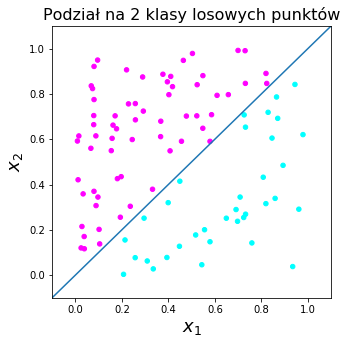

In [161]:
plt.figure(figsize=(5,5))
plt.title("Podział na 2 klasy losowych punktów",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(probka[:,0],probka[:,1],c=probka[:,2],
            s=20,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))
plt.plot(lin[0],lin[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

Linia $x_2=x_1$ oddziela punkty niebieskie od różowych, w tym przypadku podział linią jest a priori możliwy w spsób dokładny. Zbiory punktów, dla których jest to możliwe, nazywamy liniowo separowalne.

## Uczenie nadzorowane (tutaj: klasyfikacja danych)

Podstawowy problem: mamy dane, jak na powyższym rysunku (ale bez linii podziału), o których nie wiemy, w jaki sposób zostały wygenerowane. Wyobraźmy sobie na przykład, że ktoś je nam dał "na kartce papieru". Chcemy obszar (x1,x2) podzielić prostą w taki sposób, by jak najlepiej rozdzielić punkty niebieskie od różowych. Do dyspozycji mamy perceptron o dwóch wejściach (x1,x2) i progu.

Zamysł jest taki, aby odpowiednio dopasować wagi perceptronu (pamietamy, ze wagi określają jego działanie). Chcemy to zrobić w taki sposób, aby na outpucie dostać 1 dla punktu niebieskiego i 0 dla różowego. Można to uzyskać w systematyczny sposób, wykorzystując daną próbkę, gdzie o każdym punkcie posiadajacym współrzędne (x1,x2) wiemy (jako "nauczyciel"), czy jest niebieski (x1>x2), czy różowy (x1<x2). Proces ten, ukazany na drobiazgowu na przykładach dalejj, nazywamy uczeniem nadzorowanym (trenowaniem) sieci. 

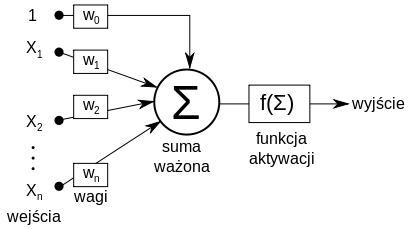

In [162]:
Image(filename="images/McCulloch-Pitts.png",width=470)

- Nauczenie (wytrenowanie) = znalezienie wag (w0,w1,w2) optymalnie rozwiązujących problem klasyfikacji, w oparciu o posiadaną próbkę. 
- Nadzorowanie oznacza, że "nauczyciel" (algorytm) wie, czy punkt jest niebieski czy różowy.

In [163]:
# początkowe wagi są dowolne, tutaj bierzemy losowe z przedziału [-0.5, 0.5]
w0=random.random()-0.5
w1=random.random()-0.5
w2=random.random()-0.5

Pamiętamy z pierwszego wykładu, że sygnał wchodzący do neuronu to

$s = x_0 w_0 + x_1 w_1 + x_2 w_2 + ... + x_n w_n$

Jeśli $s>0$, neuron "odpala", tj. na jego outpucie jest sygnał 1. W przeciwnym razie nie odpala, i daje sygnał 0.

In [164]:
# funkcja aktywacji = dobrze znana funkcja schodkowa
def f(s):
     if s > 0:
        return 1
     else:
        return 0

## Algorytm propagacji wstecznej (najprostsza postać dla pojedynczego neuronu MCP)

Dla danego (losowego) punktu, który jest niebieski (1) lub różowy (0), nasz perceptron (który jest jeszcze niewytrenowany) z aktualnymi losowymi wagami da pewną odpowiedź, poprawną lub błędną.

In [165]:
p=point() # losowy punkt
print(p)
odp=f(w0+w1*p[0]+w2*p[1]) # odpowiedź uzyskana
if odp==p[2]:             # jeśli odpowiedź uzyskana jest poprawna
    print("wynik ",odp, "(poprawny)")
else:
     print("wynik ",odp, "(błędny)")

[0.12495384 0.41804818 1.        ]
wynik  1 (poprawny)


In [166]:
probka[10]

array([0.06849706, 0.83576937, 1.        ])

**Teraz podstawowy algorytm uczenia sieci - perceptron (jedna z najważniejszych rzeczy w tym wykładzie!):** 

Jeśli wynik jak powyżej dla punktu z próbki jest poprawny, nie robimy nic. Natomiast jeśli jest błędny, to zmieniamy nieco wagi tak, aby by miał szansę być mniej błędny. Recepta jest następująca:

$w_i \to w_i$ + $\varepsilon$ $(y_t - y_u)$ $x_i$,

gdzie $\varepsilon$ to pewna niewielka liczba, $y_t$ to prawdziwa wartość odpowiedzi (wiemy, jaka ma być!), natomiast $y_u$ to uzyskana wartość odpowiedzi (może być poprawna lub błędna).

Prześledźmy, jak to działa. Załóżmy dla ustalenia uwagi, że $x_i>0$. Wtedy jeśli prawdziwa wartość $y_t=1$ jest większa od uzystanej $y_u=0$, wagi są zwiększane, zatem $w \cdot x$ rośnie i $y=f(w \cdot x)$ ma większą szansę osiągnąć poprawną wartość 1 (pamietamy, jak wygląda wykres funkcji $f$). Jeśli natomiast prawdziwa wartość $y_t=0$ jest mniejsza od uzystanej $y_u=1$, to wagi są zmniejszane, $w \cdot x$ maleje i $y=f(w \cdot x)$ ma większą szansę osiągnąć poprawną wartość 0. 

Jeśli $x_i<0$, łatwo w analogiczny sposób sprawdzić, że przepis też działa.

Powyższy wzór jest używany wielokrotnie dla tego samego punktu z próbki, następnie zapętlamy po wszystkich punktach próbki, a całość procedury możemy też jeszcze wielokrotnie powtórzyć, by w efekcie uzyskać stabilne wagi (niezmieniające się lub zmieniające się bardzo nieznacznie). 

Typowo, w takich algorytmach parameter uaktualniania (szybkość uczenia) $\varepsilon$ maleje z kolejnymi krokami. Jest technicznie to bardzo ważne, bo chodzi o to, by zbyt duże kroki nie psuły rozwiązania.


In [167]:
# algorytm uczenia 

for u in range(0,19): # powtarzamy całość wiele (20) razy
    eps=1/(u*u+1) # istotne, by parametr uaktualniania się w jakiś sposób zmniejszał w kolejnych iteracjach
                  # tu jest dowolność, wiele przepisów zadziała
                  # dodane 1, by nie dzilić przez zero
    for ind in range(0,npo-1): # pętla po punktach z próbki, ind jest numerem punktu
        for k in range(0,9): # dla każdego punktu powtarzamy 10 razy
            
            y=f(w0+w1*probka[ind,0]+w2*probka[ind,1]) # odpowiedż dla danego punktu
            
            # uaktualnienie wag
            w0=w0+eps*(probka[ind,2]-y)*1
            w1=w1+eps*(probka[ind,2]-y)*probka[ind,0]
            w2=w2+eps*(probka[ind,2]-y)*probka[ind,1]
    print(w0,w1,w2) # wydruk kontrolny 
    
# format:  w0              w1                w2      

0.1833197694506381 -2.2152043985149317 2.327845252813328
0.1833197694506381 -2.6112339058670226 2.46564080163188
0.1833197694506381 -2.5664893274812335 2.5374452045819997
0.0833197694506381 -2.6114476617800433 2.4959635526335338
0.0833197694506381 -2.6114476617800433 2.4959635526335338
0.0833197694506381 -2.6114476617800433 2.4959635526335338
0.0833197694506381 -2.6114476617800433 2.4959635526335338
0.0833197694506381 -2.6114476617800433 2.4959635526335338
0.0833197694506381 -2.6114476617800433 2.4959635526335338
0.0833197694506381 -2.6114476617800433 2.4959635526335338
0.0833197694506381 -2.6114476617800433 2.4959635526335338
0.0833197694506381 -2.6114476617800433 2.4959635526335338
0.0833197694506381 -2.6114476617800433 2.4959635526335338
0.0833197694506381 -2.6114476617800433 2.4959635526335338
0.0833197694506381 -2.6114476617800433 2.4959635526335338
0.0833197694506381 -2.6114476617800433 2.4959635526335338
0.0833197694506381 -2.6114476617800433 2.4959635526335338
0.083319769450638

In [168]:
# znalezione optymalne wagi 
w0,w1,w2

(0.0833197694506381, -2.6114476617800433, 2.4959635526335338)

In [169]:
# odpowiadajaca im linia podziału
lin=l2(w0,w1,w2)

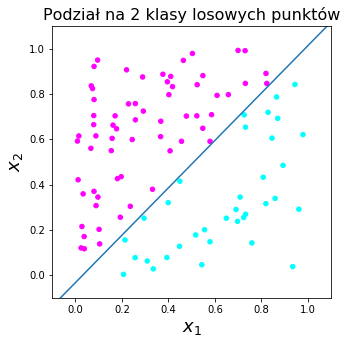

In [170]:
plt.figure(figsize=(5,5))
plt.title("Podział na 2 klasy losowych punktów",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(probka[:,0],probka[:,1],c=probka[:,2],s=20,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))
plt.plot(lin[0],lin[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

Widzimy, że nasza metoda działa! Podkreślmy, że narysowana linia podziału nie wynika z naszej wiedzy a priori, ale powstała w wyniku uczenia się perceptronu. Zauważmy też, że linia podziału nie jest dokładnie linią $x_2=x_1$, choć jest blisko. Pamietamy, że ta linia odzwierciedla uzyskane wagi, a tym samym uczenie się na danej próbce.

Mając powyższy klasyfikator, możemy go teraz użyć do klasyfikacji innych (nowych) punktów, tj. określić, czy są niebieskie czy różowe.

Ta procedura to sprawdzenie klasyfikatora, tj. określenie, na ile jest dobry.

In [171]:
ps=point() # nowy losowy punkt 
y=f(w0+w1*ps[0]+w2*ps[1]) # funkcja aktywacji (odpowiedź uzyskana)
print('punkt:',ps,'odpowiedź uzyskana:',y) # odpowiedź uzyskana zazwyczaj, ale nie zawsze, jest dobra

# format: [ x1    x2   odpowiedź poprawna ]   odpowiedź uzyskana  

punkt: [0.55649057 0.75668467 1.        ] odpowiedź uzyskana: 1


Z powodu ograniczonej wiekości próbki, wynik klasyfikacji czasem jest błędny. Dotyczy to punktów w pobliżu linii rozdzielającej, która nie jest dokładnie linią $x_2=x_1$ (a "idealistycznie" powinna nią być).

In [172]:
# sprawdzenie, jak dobrze działa nasz klasyfikator

for j in range(0,99): # test dla 100 punktów 
    ps=point() # nowy losowy punkt 
    if(f(w0+w1*ps[0]+w2*ps[1])!=ps[2]): # jeśli funkcja aktywacji (odpowiedź uzyskana) 
                                        # jest inna od poprawnej odpowiedzi
        print(f(w0+w1*ps[0]+w2*ps[1]),int(ps[2]),ps[0],ps[1])

# format: odp. uzyskana, odp. poprawna, x1, x2

1 0 0.29699931503344457 0.29617147097424257
1 0 0.14394926204352243 0.12821599599877298
1 0 0.017610010172698143 0.01346611459216196
1 0 0.09356613808528358 0.06608259736272437


Niewielka liczba nowych punktów (kilka na tysiąc) jest "przekłamanych". Są to punkty w pobliżu linii rozdzielajacej. Jeśli próbka treningowa jest większa (co przekłada się na dłuższy czas uczenia), to przekłamań dla nowych punktów jest mniej. 

## Powtórka dla zaszumionej próbki

In [173]:
# resetowanie wag, bierzemy losowe z przedziału [-0.5, 0.5]
w0=random.random()-0.5
w1=random.random()-0.5
w2=random.random()-0.5

In [174]:

noi=0.3 # poziom "zaszumenia" próbki - poniżej współrzędne są losowo nieco przesuniete

# zwraca losowe współrzędne x1, x2 oraz 1 dla x2>x1 i 0 dla x1>x2
def point():
    x1=random.random()
    x2=random.random()
    if(x2>x1):
        return np.array([x1+(random.random()-.5)*noi,x2+(random.random()-.5)*noi,1])
    else:
        return np.array([x1+(random.random()-.5)*noi,x2+(random.random()-.5)*noi,0])


In [175]:
# losowa zaszumiona próbka npo punktów 
npo=200
probka=np.array([point() for i in range(0,npo-1)])

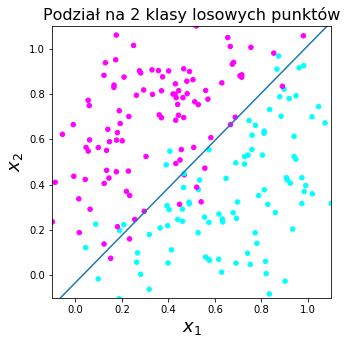

In [176]:
plt.figure(figsize=(5,5))
plt.title("Podział na 2 klasy losowych punktów",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(probka[:,0],probka[:,1],c=probka[:,2],s=20,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))
plt.plot(lin[0],lin[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

Powyżej widzimy, że linia nie rozdziela punktów w dokładny sposób, bo nie może z powodu "zaszumenia", które miesza obszary.

In [186]:
# algorytm uczenia

for u in range(30): # powtarzamy całość wiele (30) razy
    eps=1/(u+2) # istotne, by parametr uaktualniania się w jakiś sposób zmniejszał w kolejnych iteracjach
                  # tu jest dowolność, wiele przepisów zadziała
    for ind in range(0,npo-1): # pętla po punktach z próbki, ind jest numerem punktu
        for k in range(0,9): # dla każdego punktu powtarzamy 10 razy
            
            y=f(w0+w1*probka[ind,0]+w2*probka[ind,1]) # odpowiedż dla danego punktu
            
            # uaktualnienie wag
            w0=w0+eps*(probka[ind,2]-y)*1
            w1=w1+eps*(probka[ind,2]-y)*probka[ind,0]
            w2=w2+eps*(probka[ind,2]-y)*probka[ind,1]
    print(w0,w1,w2)

0.01574337763086331 -1.5423497308742267 1.7863408512580414
0.01574337763086331 -1.5548029699293253 1.8708471715561101
0.01574337763086331 -1.53448901276735 1.9244446476264816
0.21574337763086326 -1.7078397738128752 1.7896203412814984
0.21574337763086324 -1.701834159182365 1.6547992934225566
0.2157433776308632 -1.5988301917878192 1.5479346009103647
0.2157433776308632 -1.5165949790196636 1.424497343278437
0.2157433776308632 -1.443923415006066 1.2995958872183573
0.2157433776308632 -1.3208577644507111 1.2814439463224538
0.1248342867217723 -1.2172923268773055 1.2499780495430282
0.12483428672177231 -1.1811813016802686 1.1515453876788388
0.12483428672177233 -1.1506897833080374 1.0768391718104868
0.12483428672177233 -1.0485471547455383 1.0528465035995194
0.12483428672177231 -0.9971952464699735 0.9790538255248055
0.12483428672177233 -0.9490528324616315 0.9098731898297614
0.12483428672177234 -0.895578322858966 0.8714613670516119
0.12483428672177235 -0.8233098824717388 0.8471524724013145
0.124834

In [187]:
# znalezione optymalne wagi 
w0,w1,w2

(0.04150095338843901, -0.43265629114541604, 0.4043217371793475)

In [188]:
# odpowiadajaca im linia podziału
lin=l2(w0,w1,w2)

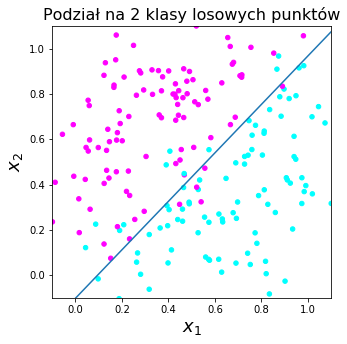

In [189]:
plt.figure(figsize=(5,5))
plt.title("Podział na 2 klasy losowych punktów",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(probka[:,0],probka[:,1],c=probka[:,2],s=20,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))
plt.plot(lin[0],lin[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

Powyżej widać, że podział jest optymalny, bo (dla obecnego przypadeku z zaszumieniem) mniej więcej tyle samo niebieskich i różowych punktów jest błędnie sklasyfikowanych (leżą "błędnie" powyżej lub poniżej linii klasyfikującej). Oczywiście, dokładnie się tych punktów nie da rozdzielić z pomocą linii prostej.

### Można "douczyć"

Widzimy, że nasza metoda działa w przybliżony sposób i dla wielu sytuacji taki rozdział wystarcza. 

Sprawdzenie (użycie) klasyfikatora:

In [190]:
for j in range(0,99): # test dla 100 punktów 
    ps=point()
    if(f(w0+w1*ps[0]+w2*ps[1])!=ps[2]):
        print(f(w0+w1*ps[0]+w2*ps[1]),int(ps[2]),ps[0],ps[1])

0 1 0.8386751510802889 0.6950449652346489
1 0 0.6315249755610641 0.6022459532860958
1 0 0.5881693384746917 0.5457580203865601
1 0 0.24904364097172113 0.2454552939664002
1 0 0.11619220150657437 0.26334258173011943
1 0 0.7617195800374832 0.7178577344949236
0 1 0.5908864929144906 0.36385040738721164


Pewna liczba punktów (kilka na 100, procentowo więcej niż bez zaszumienia) jest "przekłamanych". Są to punkty w pobliżu linii rozdzielajacej.

### Zadanie do przesłania mailem na adres bronwojtek@gmail.com

#### UWAGA: proszę przesyłać pliki notebooków jupytera (tj. w formacie *.ipynb) zawierające tylko niezbędne rzeczy (wczytanie bibliotek i zadania). Przed wysłaniem proszę koniecznie sprawdzić, czy po zresetowaniu jądra (kernel restart) wszystko się po kolei wykonuje. 

- Powtórzyć powyższe dla większej próbki szkoleniowej oraz dla różnych wartości parametru zaszumienia. Poczyń obserwacje dot. dokładności otrzymanego klasyfikatora.
- Poniżej dana jest próbka 100 punktów wygenerowanych w jakiś sposób przez Waszego magika. Sklasyfikuj te punkty analogicznie jak na wykładzie.

In [191]:
probka=np.array([[0.21411625, 0.96426023, 1.        ],
       [0.22324566, 0.75905896, 1.        ],
       [0.4117554 , 0.34329326, 0.        ],
       [0.2711907 , 0.12370197, 0.        ],
       [0.24360769, 0.69161061, 1.        ],
       [0.82557679, 0.28831672, 0.        ],
       [0.11778537, 0.18727798, 0.        ],
       [0.37364829, 0.64794825, 0.        ],
       [0.05767847, 0.22841702, 0.        ],
       [0.51382561, 0.4459305 , 0.        ],
       [0.08377459, 0.8323045 , 1.        ],
       [0.30638091, 0.94363382, 1.        ],
       [0.98635476, 0.18477572, 0.        ],
       [0.1671712 , 0.78414165, 1.        ],
       [0.54413143, 0.49782506, 0.        ],
       [0.39776042, 0.61528028, 0.        ],
       [0.95335917, 0.65703114, 0.        ],
       [0.87981245, 0.50926651, 0.        ],
       [0.67312829, 0.88043416, 1.        ],
       [0.55206559, 0.52392534, 0.        ],
       [0.42397127, 0.50171963, 0.        ],
       [0.52890739, 0.81960211, 1.        ],
       [0.26193735, 0.88260791, 1.        ],
       [0.6321066 , 0.66328535, 0.        ],
       [0.49597402, 0.78939291, 1.        ],
       [0.22327814, 0.04039445, 0.        ],
       [0.13685725, 0.10346859, 0.        ],
       [0.86794371, 0.88305935, 0.        ],
       [0.77430846, 0.60564586, 0.        ],
       [0.61566571, 0.39960006, 0.        ],
       [0.5915284 , 0.07831388, 0.        ],
       [0.81632253, 0.64406071, 0.        ],
       [0.50511946, 0.56920466, 0.        ],
       [0.16550553, 0.45745027, 0.        ],
       [0.99713275, 0.53636606, 0.        ],
       [0.01443198, 0.33898612, 0.        ],
       [0.32373937, 0.7176002 , 1.        ],
       [0.09929523, 0.10931214, 0.        ],
       [0.33271418, 0.95198756, 1.        ],
       [0.75342841, 0.18732687, 0.        ],
       [0.20004117, 0.74801575, 1.        ],
       [0.17073802, 0.60582168, 1.        ],
       [0.93276028, 0.96203644, 0.        ],
       [0.89727244, 0.21999518, 0.        ],
       [0.26505477, 0.32804044, 0.        ],
       [0.98775909, 0.59690451, 0.        ],
       [0.73123641, 0.4223595 , 0.        ],
       [0.13765982, 0.45835786, 0.        ],
       [0.58890224, 0.83358183, 1.        ],
       [0.69194158, 0.4892326 , 0.        ],
       [0.73285548, 0.79854423, 0.        ],
       [0.79537148, 0.00726942, 0.        ],
       [0.13863056, 0.64524872, 1.        ],
       [0.6180183 , 0.29632804, 0.        ],
       [0.15508292, 0.27094423, 0.        ],
       [0.23975514, 0.44338425, 0.        ],
       [0.45848827, 0.74047281, 1.        ],
       [0.92297693, 0.25545246, 0.        ],
       [0.74555793, 0.96315318, 1.        ],
       [0.41847552, 0.15568741, 0.        ],
       [0.26959336, 0.32159808, 0.        ],
       [0.29042272, 0.36942159, 0.        ],
       [0.91177321, 0.87743833, 0.        ],
       [0.25887314, 0.16953158, 0.        ],
       [0.06844735, 0.63782016, 1.        ],
       [0.77424525, 0.9895361 , 1.        ],
       [0.05633817, 0.35357194, 0.        ],
       [0.67019683, 0.97380585, 1.        ],
       [0.53481062, 0.26041486, 0.        ],
       [0.40106496, 0.90400998, 1.        ],
       [0.30992124, 0.81593767, 1.        ],
       [0.91972018, 0.01540877, 0.        ],
       [0.78343784, 0.56966247, 0.        ],
       [0.05488208, 0.17363594, 0.        ],
       [0.7586225 , 0.04681934, 0.        ],
       [0.47529445, 0.09100629, 0.        ],
       [0.04372663, 0.02394718, 0.        ],
       [0.66592134, 0.39809222, 0.        ],
       [0.13766527, 0.16501437, 0.        ],
       [0.41401435, 0.49161511, 0.        ],
       [0.53677115, 0.55888038, 0.        ],
       [0.67360044, 0.14661837, 0.        ],
       [0.30318252, 0.97307937, 1.        ],
       [0.16660573, 0.76354061, 1.        ],
       [0.71190111, 0.35465919, 0.        ],
       [0.39960201, 0.61395272, 0.        ],
       [0.50833303, 0.4420134 , 0.        ],
       [0.5678389 , 0.47170079, 0.        ],
       [0.89698516, 0.31700293, 0.        ],
       [0.28335266, 0.63933601, 0.        ],
       [0.21456851, 0.42848696, 0.        ],
       [0.41184576, 0.06591686, 0.        ],
       [0.60086703, 0.0054513 , 0.        ],
       [0.49675323, 0.76765488, 1.        ],
       [0.81782645, 0.54481398, 0.        ],
       [0.87868515, 0.33396848, 0.        ],
       [0.89431149, 0.36767782, 0.        ],
       [0.74675681, 0.33050737, 0.        ],
       [0.20001737, 0.18582118, 0.        ]])

Na poprzednim wykładzie zobaczyliśmy, że pojedynczy neuron MCP może byc użyty do klasyfikacji tzw. zbiorów  liniowo separowalnych. Teraz zajmiemy się bardziej zaawansowanymi przypadkami, mogącymi klasyfikować bardziej złożone zbiory.

## Więcej warstw perceptronu

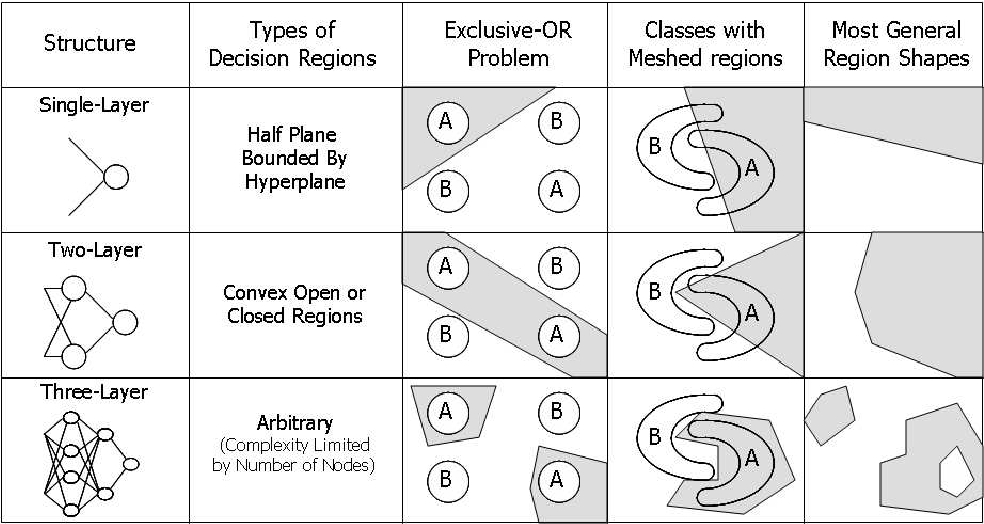

In [29]:
Image(filename="images/obszary.png",width=600)

W niniejszym wykładzie omawiamy w dokładny sposób proste sieci neuronowe. Obecnie jesteśmy w górnym wierszu powyższej grafiki, tj. zajmujemy się perceptronem o jednym neuronie. Taki prościutki układ jest w stanie klasyfikować tzw. zbiory liniowo separowalne, czyli dające się oddzielić jedną linia na płaszczyźnie (lub hiperpowierzchnią w większej liczbie wymiarów). Okazuje się, że sieci o dodatkowej warswie pośredniej, tj. dwuwarswtwowe, mogą klasyfikować zbiory wypukłe, a trzywarstwowe (o stosownie dużej liczbie neuronów) dowolne zbiory.
    

## Konstrukcja i wizualizacja wielowarstwowego perceptronu (sieć przekazująca sygnał do przodu, feed-forward network)

In [192]:
# tablice n_war (liczba węzłów w warstwach) i wagi (pomiedzy wszystkimi sąsiednimi warstwami) specyfikują sieć

n_war=np.array([2,5,10,3,2]) # liczby węzłów w kolejnych warstwach (licząc też "węzły progowe" o inpucie 1)

# n_war=np.array([3,2]) # liczby węzłów w kolejnych warstwach (licząc też "węzły progowe" o inpucie 1)

li_war=len(n_war) # liczba warstw (licząc warstwę inputową)

wagi={}

# inicjalizujemy wszystkie wagi np. jako 0
for i in range(li_war-1): 
    wagi.update({i+1 : np.zeros([n_war[i],n_war[i+1]-1])}) # wagi miedzy warstwą i a i+1
                                            # -1 bo nie ma połączenia do węzła progowego
# (wagi mają struktura słownika)

In [193]:
li_war # liczba wszystkich warstw, wliczając inputową

5

In [194]:
n_war[1] # liczba węzłów w warstwie inputowej

5

In [195]:
wagi[1] # wagi od inputu do pierwszej warstwy pośredniej (tablica 4 na 2)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Teraz bardzo pomocne narysowanie naszej sieci

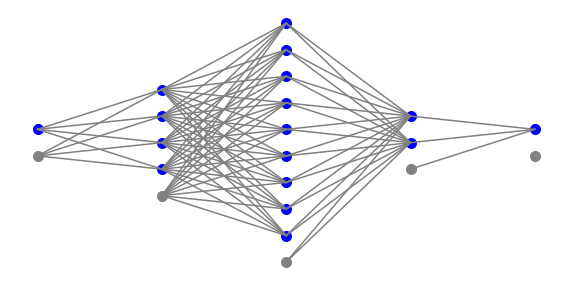

In [196]:
plt.figure(figsize=(10,5)) # rozmiar rysunku

for i in range(li_war): # pętla po warstwach
    for j in range(1,n_war[i]): # pętla po węzłach innych niż progowe w warstwie (zaczynamy od 1)
        plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
        # rysuj punkt o współrzędnej poziomej i oraz współrzędnej pionowej rosnącej z j 
        # odjęcie n_war[i]/2 powoduje, że średnie pionowe połozenie punktów jest 0
        
for i in range(li_war): # pętla po warstwach
        plt.scatter(i, 0-n_war[i]/2, s=100,c='gray') # dodaj węzły progowe innym kolorem
        
        
for i in range(li_war-1): # pętla po warstwach z wyjątkim ostatniej
    for j in range(n_war[i]): # pętla po węzłach, z których wychodzi krawędź
        for k in range(n_war[i+1]-1):  # pętla po węzłach z kolejnej wartwy, do których wchodzi krawędź
            plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c='gray') # rysowanie krawędzi
            # współrzędne odpowiadają współrzędnym punktu

        
plt.axis("off");   

W warstwie outputowej nie trzeba rysować węzła progowego, bo jest on izolowany.

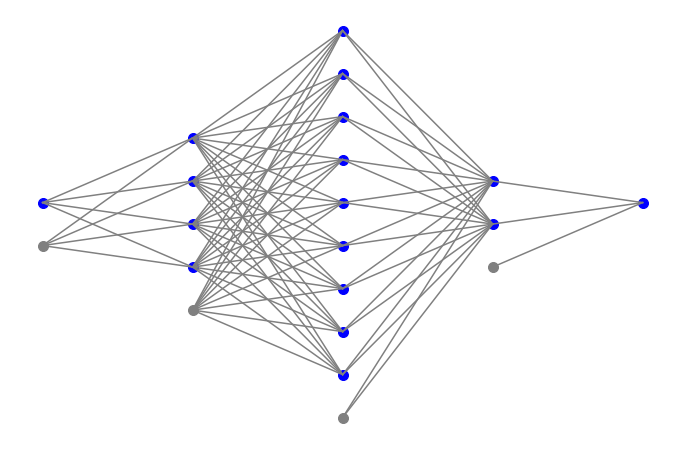

In [197]:
plt.figure(figsize=(12,8)) # rozmiar rysunku

for i in range(li_war): # pętla po warstwach
    for j in range(1,n_war[i]): # pętla po węzłach innych niż progowe w warstwie (zaczynamy od 1)
        plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
        # rysuj punkt o współrzędnej poziomej i oraz współrzędnej pionowej rosnącej z j 
        # odjęcie n_war[i]/2 powoduje, że średnie pionowe połozenie punktów jest 0
        
for i in range(li_war-1): # pętla po warstwach z wyjatkiem outputowej
        plt.scatter(i, 0-n_war[i]/2, s=100,c='gray') # dodaj węzły progowe innym kolorem
        
        
for i in range(li_war-1): # pętla po warstwach z wyjątkim ostatniej
    for j in range(n_war[i]): # pętla po węzłach, z których wychodzi krawędź
        for k in range(n_war[i+1]-1):  # pętla po węzłach z kolejnej wartwy, do których wchodzi krawędź
            plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c='gray') # rysowanie krawędzi
            # współrzędne odpowiadają współrzędnym punktu

        
plt.axis("off");   

In [198]:
# losowe wagi
for i in range(li_war-1):
    for j in range(n_war[i]):
        for k in range(n_war[i+1]-1):
            wagi[i+1][j][k]=1-2*random.random() # liczba losowa z przedziału [-1,1]

In [199]:
for i in range(1,li_war): 
    print("wagi między warstwami ",i,"-",i+1,":\n",wagi[i])

wagi między warstwami  1 - 2 :
 [[-0.93278732 -0.69335299  0.01390473 -0.2934505 ]
 [ 0.8987423   0.11703762 -0.3113809   0.34712684]]
wagi między warstwami  2 - 3 :
 [[ 0.47118964 -0.27001702  0.52353134  0.46509845 -0.15533676 -0.77049233
   0.23551043 -0.94865868  0.26870347]
 [-0.59303986  0.00455658  0.3761076   0.58364584 -0.16268004 -0.01101627
   0.19071981  0.46368274 -0.37813489]
 [-0.55689985  0.10338351 -0.07430234  0.191278    0.08111135  0.35277753
   0.65603167 -0.02172578 -0.44308381]
 [ 0.60714569  0.47875416 -0.35133683 -0.22487231  0.82417984 -0.59759907
  -0.11772379  0.5485046  -0.93149284]
 [ 0.46020393  0.16373088 -0.23376086 -0.85580571 -0.38199741 -0.92813949
   0.1519896   0.84265764  0.36170889]]
wagi między warstwami  3 - 4 :
 [[-0.12955106  0.30413213]
 [ 0.82854541  0.45082313]
 [ 0.40690367 -0.83988478]
 [-0.39792307  0.06740928]
 [ 0.56062904  0.56081957]
 [-0.77149802  0.4682127 ]
 [ 0.50879974  0.24527175]
 [-0.94764703  0.86468091]
 [ 0.55251391 -0.82

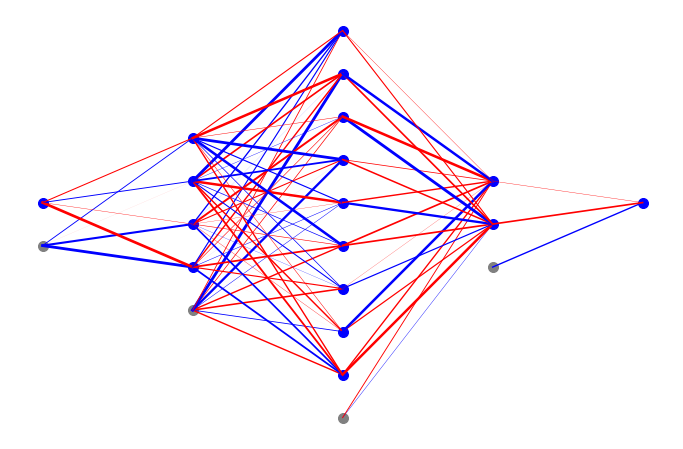

In [200]:

plt.figure(figsize=(12,8)) # rozmiar rysunku

for i in range(li_war): # pętla po warstwach
    for j in range(1,n_war[i]): # pętla po węzłach innych niż progowe w warstwie (zaczynamy od 1)
        plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
        # rysuj punkt o współrzędnej poziomej i oraz współrzędnej pionowej rosnącej z j 
        # odjęcie n_war[i]/2 powoduje, że średnie pionowe połozenie punktów jest 0
        
for i in range(li_war-1): # pętla po warstwach z wyjatkiem outputowej
        plt.scatter(i, 0-n_war[i]/2, s=100,c='gray') # dodaj węzły progowe innym kolorem
    
        
for i in range(li_war-1):
    for j in range(n_war[i]):
        for k in range(n_war[i+1]-1):
            th=3*wagi[i+1][j][k] # grubość linii zależy od wielkości wagi
            if th>0:
                col='red'  # czerwony dla dodatnich wag
            else:
                col='blue' # niebieski dla ujemnych
            th=abs(th)
            plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c=col,linewidth=th)

        
plt.axis("off");

## Transmisja sygnału z inputu do przodu (feed forward)

In [201]:
x={} # słownik, który będzie zawierać warości sygnałów we wszystkkich warstwach

x.update({0: np.array([1,0.9])}) 
 # najpierw musi być 1, patrz rysunek, jest to najniższy węzeł po lewej (progowy)
 # potem dajemy przykładowo 0.5   
                                
x[0] # sygnał w warstwie inputowej

array([1. , 0.9])

Wiemy już dobrze, że dla pojedynczego neuronu sygnał wchodzący obliczany jest jako

$s = x_0 w_0 + x_1 w_1 + x_2 w_2 + ... + x_n w_n$

Jeśli mamy kilka neuronów w warstwie numerowanych wskaźnikiem $i$  od 1 do $m$, to wagom przydzielamy drugi wskaźnik $i$. Wtedy 

$s_i = x_0 w_{0i} + x_1 w_{1 i}+ x_2 w_{2 i} + ... + x_n w_{ni} = \sum_{j=0}^n x_j w_{ji}$, 

co w przyjetej tutaj konwencji odpowiada mnożeniu wektora (transponowanego) przez macierz, $s^T=x^T W$. W jawnej notacji (pamiętamy z algebry, że mnożymie wiersze przez kolumny), mamy

$\begin{pmatrix} s_1 & s_2 & ...& s_m \end{pmatrix} = \begin{pmatrix} x_0 & x_1 & ...& x_n \end{pmatrix}\begin{pmatrix} w_{01} & w_{02} & ...& w_{0m} \\ w_{11} & w_{12} & ...& w_{1m} \\ 
 ... & ... & ...& ... \\ w_{n1} & w_{n2} & ...& w_{nm} \end{pmatrix}$.

Sygnał $s$ docierający do kolejnej warstwy to sygnał $x$ z poprzedniej warswy pomnożony przez macierz wag. 
Sygnał jest w taki sposób przekazywany do kolejnych warstw, aż osiągnie warstwe outputową.

Mnożenie macierzowe to instrukcja np.dot

In [202]:
np.dot(x[0],wagi[1]) # sygnał w kolejnej wastwie

array([-0.12391926, -0.58801913, -0.26633808,  0.01896365])

In [203]:
# musimy jeszcze dołożyć sygnał dla progu o wartości 1
np.insert(np.dot(x[0],wagi[1]),0,1)

array([ 1.        , -0.12391926, -0.58801913, -0.26633808,  0.01896365])

Traz, zrozumiawszy co się dzieje, możemy cały proces zautomatyzować dla wszystkich warstw.

In [204]:
for i in range(1,li_war): # pętla po warstwach począwszy od pierwszej po inpucie
    a=np.dot(x[i-1],wagi[i]) # sygnał docierający do warstwy i
    b=[f(a[q]) for q in range(len(a))] # sygnał wychodzacy z warstwy (określony prze funkcję f)
    x.update({i: np.insert(b,0,1)}) # dopisanie do słownika po wstawieniu sygnału 1 dla węzła progowego
    
x   

{0: array([1. , 0.9]),
 1: array([1, 0, 0, 0, 1]),
 2: array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1]),
 3: array([1, 0, 1]),
 4: array([1, 0])}

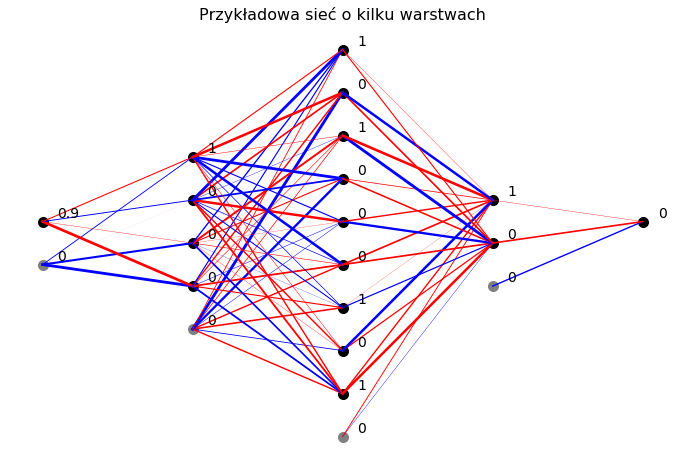

In [205]:
plt.figure(figsize=(12,8))

for i in range(li_war):
    for j in range(1,n_war[i]):
        plt.scatter(i, j-n_war[i]/2, s=100,c='black')
        lab=x[i][j]
        plt.text(i+0.1, j-n_war[i]/2+0.1, lab, fontsize=14)
        
for i in range(li_war-1):
        plt.scatter(i, 0-n_war[i]/2, s=100,c='gray')
        plt.text(i+0.1,0-n_war[i]/2+0.1, lab, fontsize=14)
        
        
for i in range(li_war-1):
    for j in range(n_war[i]):
        for k in range(n_war[i+1]-1):
            th=3*wagi[i+1][j][k]
            if th>0:
                col='red'
            else:
                col='blue'
            th=abs(th)
            plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c=col,linewidth=th)

plt.title("Przykładowa sieć o kilku warstwach",fontsize=16)
        
plt.axis("off");   

Jest to model obliczeniowy o dużej liczbie parametrów (liczbie wag, tj. krawędzi na rysunku)

In [206]:
li_par=0

for i in range(1,li_war):
    li_par+=n_war[i-1]*(n_war[i]-1)
li_par

76

# Wykład 4 (zaczyna się las, coraz więcej drzew!)

Zanim rozpoczniemy nowy materiał, wrócimy na chwilę do poprzedniego wykładu i utworzymy kilka użytecznych funkcji/modułów, grupując zawartości kilku komórek. Taka "automatyzacja" jest bardzo wygodna i zwiększa przejrzystość kodu.

In [207]:
# funkcja aktywacji = dobrze znana funkcja schodkowa
def f(s):
     if s > 0:
        return 1
     else:
        return 0

### Zebranie oddzielnych instrukcji w jedną funkcję

In [208]:
def plot_net(n_war):
    """Narysuj szkielet sieci"""
    li_war=len(n_war)
    plt.figure(figsize=(7,4)) # rozmiar rysunku

    for i in range(li_war): # pętla po warstwach
        for j in range(1,n_war[i]): # pętla po węzłach innych niż progowe w warstwie (zaczynamy od 1)
            plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
            # rysuj punkt o współrzędnej poziomej i oraz współrzędnej pionowej rosnącej z j 
            # odjęcie n_war[i]/2 powoduje, że średnie pionowe połozenie punktów jest 0
        
    for i in range(li_war-1): # pętla po warstwach z wyjatkiem outputowej
            plt.scatter(i, 0-n_war[i]/2, s=100,c='gray') # dodaj węzły progowe innym kolorem
    
    for i in range(li_war-1): # pętla po warstwach z wyjątkim ostatniej
        for j in range(n_war[i]): # pętla po węzłach, z których wychodzi krawędź
            for k in range(n_war[i+1]-1):  # pętla po węzłach z kolejnej wartwy, do których wchodzi krawędź
                plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c='gray') # rysowanie krawędzi
                # współrzędne odpowiadają współrzędnym punktu

    plt.title("Sieć o inpucie i " + str(li_war-1)+" warstwach",fontsize=16)

    plt.axis("off")
    plt.show()

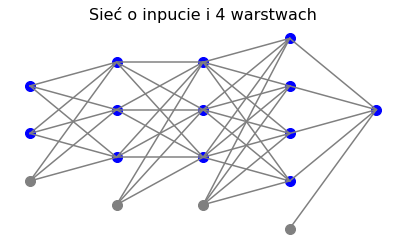

In [209]:
plot_net([3,4,4,5,2])

In [210]:
def plot_net_w(n_war, wagi):
    """Narysuj sieć z wagami"""
    li_war=len(n_war)
    plt.figure(figsize=(7,4)) # rozmiar rysunku

    for i in range(li_war): # pętla po warstwach
        for j in range(1,n_war[i]): # pętla po węzłach innych niż progowe w warstwie (zaczynamy od 1)
            plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
            # rysuj punkt o współrzędnej poziomej i oraz współrzędnej pionowej rosnącej z j 
            # odjęcie n_war[i]/2 powoduje, że średnie pionowe połozenie punktów jest 0
        
    for i in range(li_war-1): # pętla po warstwach z wyjatkiem outputowej
            plt.scatter(i, 0-n_war[i]/2, s=100,c='gray') # dodaj węzły progowe innym kolorem
    
    li_par=0 #liczba wag
    
    for i in range(li_war-1):
        for j in range(n_war[i]):
            for k in range(n_war[i+1]-1):
                li_par+=1
                th=3*wagi[i+1][j][k]
                if th>0:
                    col='red'
                else:
                    col='blue'
                th=abs(th)
                plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c=col,linewidth=th)
                

    plt.title("Sieć o inpucie i "+str(li_war-1)+" warstwach (liczba wag: "+str(li_par)+")",fontsize=16)

    plt.axis("off")
    plt.show()

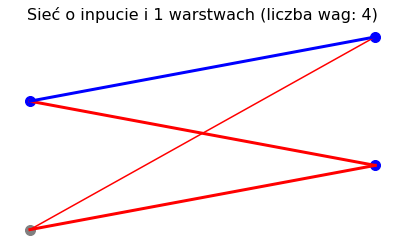

In [211]:
plot_net_w([2,3],{1:[[1,.5],[1,-1]]})

Pamietamy, że w naszej konwencji liczby wierzchołków zawierają wierzchołek progowy. Poniżej: [2,3,5]

Słownik wag zaczyna się od 1  i kończy na liczbie warstw minus (warswy numerujemy począwszu od 0). Poniżej: {1: ..., 2: ...}

Elementy słownika wag to macierze o wymiarze 2. Liczba wierszy wynosi tyle, ile jest elementów jest w warstwie wejściowej, a liczba kolumn tyle, ile jest elementów w warswie wyjściowej minus 1, bo nie uwzględniamy wierzchołka progowego.

Poniżej między warstwą 0 a 1 (element 1 słownika) mamy macierz 2x2, a między warstwą 1 a 2 (element 2 słownika) macierz 3x4.

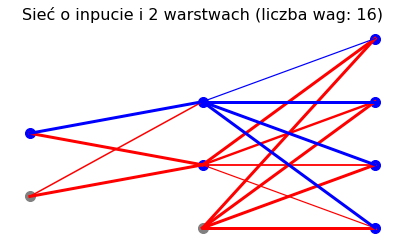

In [212]:
plot_net_w([2,3,5],{1:[[1,.5],[1,-1]],2:[[1,1,1,1],[.4,.6,.8,1],[-1,-1,-1,-.4]]})

In [213]:
def feed_forward(n_war, wagi, x_in):
    """Propagacja sygnału w przód"""
    li_war=len(n_war)
    
    x={} # słownik, który będzie zawierać warości sygnałów we wszystkkich warstwach
    x.update({0: np.array(x_in)}) 
    
    for i in range(1,li_war): # pętla po warstwach począwszy od pierwszej po inpucie
        a=np.dot(x[i-1],wagi[i]) # sygnał docierający do warstwy i
        b=[f(a[q]) for q in range(len(a))] # sygnał wychodzacy z warstwy (określony prze funkcję f)
        x.update({i: np.insert(b,0,1)}) # dopisanie do słownika po wstawieniu sygnału 1 dla węzła progowego
        
    return x

In [214]:
# prześlij sygnał [1, -3.5] do przodu
feed_forward([2,3,5],{1:[[1,.5],[1,-1]],2:[[1,1,1,1],[.4,.6,.8,1],[-1,-1,-1,-.4]]},[1,-3.5])

{0: array([ 1. , -3.5]), 1: array([1, 0, 1]), 2: array([1, 0, 0, 0, 1])}

In [215]:
def plot_net_w_x(n_war, wagi, x):
    """Narysuj sieć z wagami i sygnałami"""
    li_war=len(n_war)
    plt.figure(figsize=(7,4)) # rozmiar rysunku

    for i in range(li_war): # pętla po warstwach
        for j in range(1,n_war[i]): # pętla po węzłach innych niż progowe w warstwie (zaczynamy od 1)
            plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
            # rysuj punkt o współrzędnej poziomej i oraz współrzędnej pionowej rosnącej z j 
            # odjęcie n_war[i]/2 powoduje, że średnie pionowe połozenie punktów jest 0
            lab=round(x[i][j],3)
            plt.text(i+0.1, j-n_war[i]/2+0.1, lab, fontsize=14)
    
    for i in range(li_war-1): # pętla po warstwach z wyjatkiem outputowej
            plt.scatter(i, 0-n_war[i]/2, s=100,c='gray') # dodaj węzły progowe innym kolorem
    
    li_par=0 #liczba wag
    
    for i in range(li_war-1):
        for j in range(n_war[i]):
            for k in range(n_war[i+1]-1):
                li_par+=1
                th=3*wagi[i+1][j][k]
                if th>0:
                    col='red'
                else:
                    col='blue'
                th=abs(th)
                plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c=col,linewidth=th)

#    plt.title("Sieć o inpucie i "+str(li_war-1)+" warstwachS (liczba wag: "+str(li_par)+")",fontsize=16)

    plt.axis("off")
    plt.show()

### Jesteśmy teraz gotowi do zwartego zapisu programistycznego:

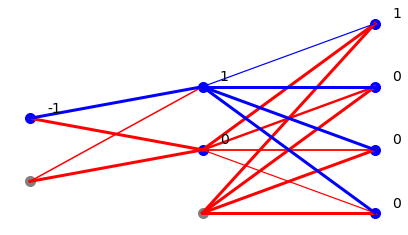

In [216]:
n_war=[2,3,5] # liczby węzłów w warstwach
wagi={1:[[1,.5],[1,-1]],2:[[1,1,1,1],[.4,.6,.8,1],[-1,-1,-1,-.4]]} # słownik macierzy wag
x_in=[1,-1] # input (pierwszy element ma być 1 - próg)

x=feed_forward(n_war,wagi,x_in) # propagacja sygnału do przodu

plot_net_w_x(n_war, wagi, x) # rysunek

## Powróćmy teraz jeszcze do klasyfikatora punktów na płaszczyźnie

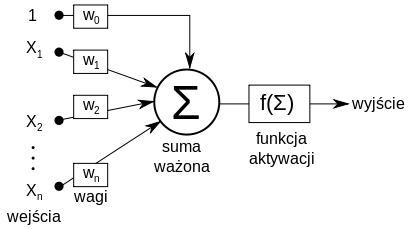

In [217]:
Image(filename="images/McCulloch-Pitts.png",width=400)

Pamietamy, że była to sieć z jednego neuronu, tj.  majaca tylko dwie warstwy. Inputem są dwie współrzędne punktu na płaszczyźnie, a outputem 1 lub zero w zależnsci, czy punkt leży pod czy nad daną linią.

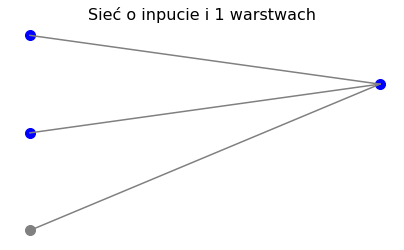

In [218]:
plot_net([3,2])

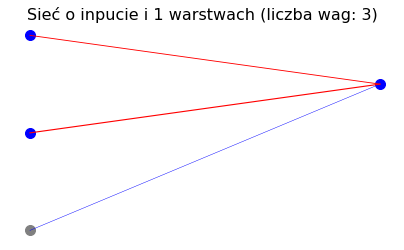

In [219]:
# bierzemy na początek losowe wagi z przedziału [-0.5, 0.5]
w0=random.random()-0.5
w1=random.random()-0.5
w2=random.random()-0.5

plot_net_w([3,2],{1: [[w0],[w1],[w2]]}) # zwróć uwagę na nawiasy klamrowe

**Algorytm uczenia perceptronu**

Jeśli wynik dla punktu z próbki jest poprawny, nie robimy nic z wagami. Natomiast jeśli jest błędny, to zmieniamy nieco wagi tak, aby by *miał szansę być mniej błędny*. Recepta jest następująca:

$w_i \to w_i + \varepsilon \, (y_t - y_u) \, x_i$,

gdzie $\varepsilon$ to pewna niewielka liczba (szybkość uczenia), $y_t$ to prawdziwa wartość odpowiedzi (wiemy, jaka ma być!), natomiast $y_u$ to uzyskana wartość odpowiedzi (może być poprawna lub błędna).

Iterujemy po punktach i powtarzamy całość wielokrotnie.

In [220]:
# Algorytm uczenia nadzorowanego dla pojedynczego perceptronu, wytłumaczony w poprzednim wykładzie

def teach_perceptron(probka, eps, w_in):
    [[w0],[w1],[w2]]=w_in # początkowe wagi
    for ind in range(len(probka)): # pętla po punktach z próbki, ind jest numerem punktu
        for k in range(0,9):       # dla każdego punktu powtarzamy 10 razy
            
            y=f(w0+w1*probka[ind,0]+w2*probka[ind,1]) # odpowiedź dla danego punktu
            
            # uaktualnienie wag
            w0=w0+eps*(probka[ind,2]-y)*1
            w1=w1+eps*(probka[ind,2]-y)*probka[ind,0]
            w2=w2+eps*(probka[ind,2]-y)*probka[ind,1]
    return [[w0],[w1],[w2]]

Przykładowa próbka (tutaj ta z pracy domowej, można wziąć dowolną). A propos, ostała ona wygenerowana z warunkiem 
$x_2>\frac{1}{2} + \frac{1}{2} \, x_1$.

In [221]:
probka=np.array([[0.21411625, 0.96426023, 1.        ],
       [0.22324566, 0.75905896, 1.        ],
       [0.4117554 , 0.34329326, 0.        ],
       [0.2711907 , 0.12370197, 0.        ],
       [0.24360769, 0.69161061, 1.        ],
       [0.82557679, 0.28831672, 0.        ],
       [0.11778537, 0.18727798, 0.        ],
       [0.37364829, 0.64794825, 0.        ],
       [0.05767847, 0.22841702, 0.        ],
       [0.51382561, 0.4459305 , 0.        ],
       [0.08377459, 0.8323045 , 1.        ],
       [0.30638091, 0.94363382, 1.        ],
       [0.98635476, 0.18477572, 0.        ],
       [0.1671712 , 0.78414165, 1.        ],
       [0.54413143, 0.49782506, 0.        ],
       [0.39776042, 0.61528028, 0.        ],
       [0.95335917, 0.65703114, 0.        ],
       [0.87981245, 0.50926651, 0.        ],
       [0.67312829, 0.88043416, 1.        ],
       [0.55206559, 0.52392534, 0.        ],
       [0.42397127, 0.50171963, 0.        ],
       [0.52890739, 0.81960211, 1.        ],
       [0.26193735, 0.88260791, 1.        ],
       [0.6321066 , 0.66328535, 0.        ],
       [0.49597402, 0.78939291, 1.        ],
       [0.22327814, 0.04039445, 0.        ],
       [0.13685725, 0.10346859, 0.        ],
       [0.86794371, 0.88305935, 0.        ],
       [0.77430846, 0.60564586, 0.        ],
       [0.61566571, 0.39960006, 0.        ],
       [0.5915284 , 0.07831388, 0.        ],
       [0.81632253, 0.64406071, 0.        ],
       [0.50511946, 0.56920466, 0.        ],
       [0.16550553, 0.45745027, 0.        ],
       [0.99713275, 0.53636606, 0.        ],
       [0.01443198, 0.33898612, 0.        ],
       [0.32373937, 0.7176002 , 1.        ],
       [0.09929523, 0.10931214, 0.        ],
       [0.33271418, 0.95198756, 1.        ],
       [0.75342841, 0.18732687, 0.        ],
       [0.20004117, 0.74801575, 1.        ],
       [0.17073802, 0.60582168, 1.        ],
       [0.93276028, 0.96203644, 0.        ],
       [0.89727244, 0.21999518, 0.        ],
       [0.26505477, 0.32804044, 0.        ],
       [0.98775909, 0.59690451, 0.        ],
       [0.73123641, 0.4223595 , 0.        ],
       [0.13765982, 0.45835786, 0.        ],
       [0.58890224, 0.83358183, 1.        ],
       [0.69194158, 0.4892326 , 0.        ],
       [0.73285548, 0.79854423, 0.        ],
       [0.79537148, 0.00726942, 0.        ],
       [0.13863056, 0.64524872, 1.        ],
       [0.6180183 , 0.29632804, 0.        ],
       [0.15508292, 0.27094423, 0.        ],
       [0.23975514, 0.44338425, 0.        ],
       [0.45848827, 0.74047281, 1.        ],
       [0.92297693, 0.25545246, 0.        ],
       [0.74555793, 0.96315318, 1.        ],
       [0.41847552, 0.15568741, 0.        ],
       [0.26959336, 0.32159808, 0.        ],
       [0.29042272, 0.36942159, 0.        ],
       [0.91177321, 0.87743833, 0.        ],
       [0.25887314, 0.16953158, 0.        ],
       [0.06844735, 0.63782016, 1.        ],
       [0.77424525, 0.9895361 , 1.        ],
       [0.05633817, 0.35357194, 0.        ],
       [0.67019683, 0.97380585, 1.        ],
       [0.53481062, 0.26041486, 0.        ],
       [0.40106496, 0.90400998, 1.        ],
       [0.30992124, 0.81593767, 1.        ],
       [0.91972018, 0.01540877, 0.        ],
       [0.78343784, 0.56966247, 0.        ],
       [0.05488208, 0.17363594, 0.        ],
       [0.7586225 , 0.04681934, 0.        ],
       [0.47529445, 0.09100629, 0.        ],
       [0.04372663, 0.02394718, 0.        ],
       [0.66592134, 0.39809222, 0.        ],
       [0.13766527, 0.16501437, 0.        ],
       [0.41401435, 0.49161511, 0.        ],
       [0.53677115, 0.55888038, 0.        ],
       [0.67360044, 0.14661837, 0.        ],
       [0.30318252, 0.97307937, 1.        ],
       [0.16660573, 0.76354061, 1.        ],
       [0.71190111, 0.35465919, 0.        ],
       [0.39960201, 0.61395272, 0.        ],
       [0.50833303, 0.4420134 , 0.        ],
       [0.5678389 , 0.47170079, 0.        ],
       [0.89698516, 0.31700293, 0.        ],
       [0.28335266, 0.63933601, 0.        ],
       [0.21456851, 0.42848696, 0.        ],
       [0.41184576, 0.06591686, 0.        ],
       [0.60086703, 0.0054513 , 0.        ],
       [0.49675323, 0.76765488, 1.        ],
       [0.81782645, 0.54481398, 0.        ],
       [0.87868515, 0.33396848, 0.        ],
       [0.89431149, 0.36767782, 0.        ],
       [0.74675681, 0.33050737, 0.        ],
       [0.20001737, 0.18582118, 0.        ]])

### Zebranie powyższych kroków w całość

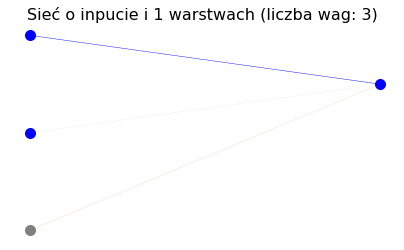

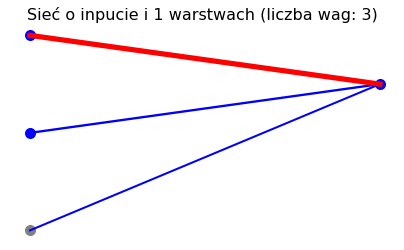

[[-0.676311637160145], [-0.7719438888660559], [1.7361118902120531]]


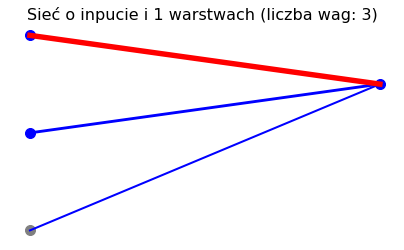

[[-0.6763116371601449], [-0.9509039253660557], [1.8036613932120533]]


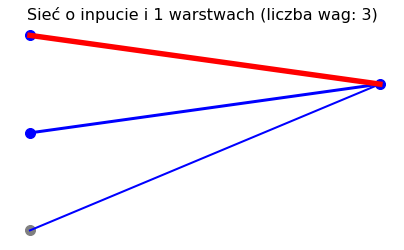

[[-0.6763116371601449], [-0.9971291253660558], [1.8012451486120533]]


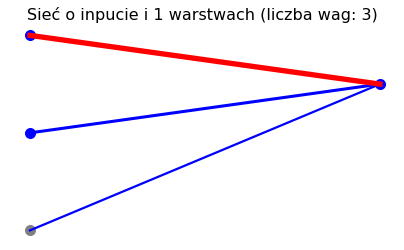

[[-0.7463116371601448], [-1.0114529285660558], [1.772153283012053]]


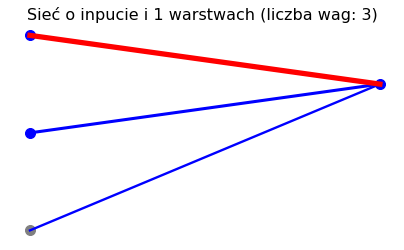

[[-0.7874881077483801], [-1.0180513640954674], [1.7507567791297]]


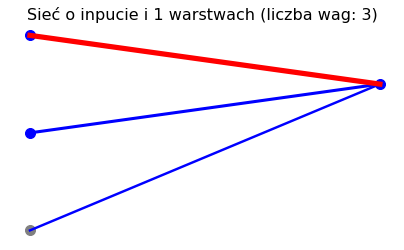

[[-0.814411184671457], [-1.019934689595467], [1.7369986253604695]]


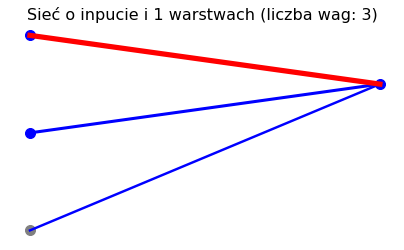

[[-0.814411184671457], [-1.015897381514386], [1.7394262796577669]]


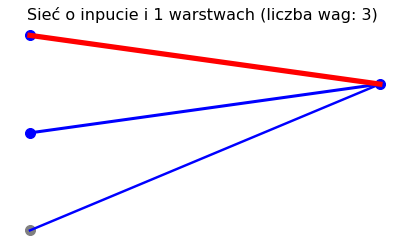

[[-0.814411184671457], [-1.012909773534386], [1.7412227438377668]]


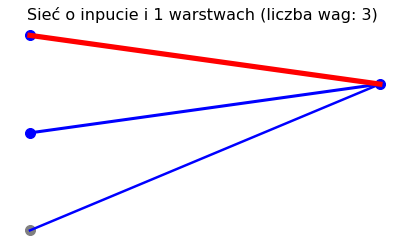

[[-0.8251804154406878], [-1.0159612637190014], [1.7343375868069975]]


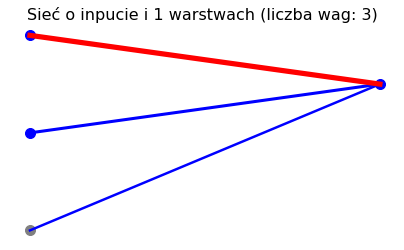

[[-0.8251804154406878], [-1.0144662036336356], [1.7352009497338268]]


In [222]:
wagi=[[random.random()-0.5], [random.random()-0.5], [random.random()-0.5]] # inicjalizacja (losowych) wag

plot_net_w([3,2],{1: wagi}) # rysunek początkowej sieci
 
for r in range(10): # powtórz 10 razy
    wagi=teach_perceptron(probka,.7/(r*r+1),wagi) # za każdą rundą uczenie jest wolniejsze, 0.7/(r*r+1)
    plot_net_w([3,2],{1: wagi}) # wydruk aktualnych wag
    print(wagi)                 # rysunek zaktualizowanej sieci


# Interpretacja uczenia nadzorowanego perceptronu jako minimalizacja błędu jego działania na próbce szkoleniowej

Na początek zauważmy, że w naszym przykładzie linia rozdzielajaca dana jest równaniem 

$w_0+w_1 x_1 + w_2 x_2 = 0$.

Dla $w_0 \neq 0$ możemy podzielić przez $w_0$:

$1+w_1/w_0 \, x_1 + w_2/w_0 \, x_2 = 0$, lub $1+v_1 x_1 + v_2 x_2 = 0$.

Mamy zatem tak na prawdę tylko 2 parametry, $v_1$ i $v_2$. 

**UWAGA:** Jeśli $w_0<0$, to przy dzieleniu nierówność $w_0+w_1 x_1 + w_2 x_2 > 0$ zmienia kierunek na $1+v_1 x_1 + v_2 x_2 < 0$. W tej sytuacji odpowiedź błędna i poprawna zamieniają się miejscami!

UWAGA: Zauważmy, że np. dla warunku $x_2>x_1$ linia rozdzielająca ma równanie $x_1-x_2=0$, tj. $w_0=0$. W tym przypadku nie możemy więc podzielic przez $w_0$, ale możemy np. podzielić przez $w_1 \neq 0$, dostając równanie linii rozdzielającej (w algortytmie nie wiemy, że $w_0=0$, to nam dopiero powinno wyjść w procesie uczenia)

$w_0/w_1+ x_1 + w_2/w_0 \, x_2 = v_0 + x_1 + v_2 x_2=0$.

Znowu więc mamy 2 parametry, $v_0$ i $v_2$.

Dla danych wartości $v_1$ i $v_2$ i dla konkretnego punktu z próbki sieć da odpowiedź poprawną lub błędną. Utworzymy teraz *funkcję błędu* $B$ w taki sposób, że każdy punkt próbki $p$ wniesie do niej 1 jeśli odpowiedź jest błędna, a 0 jeśli jest poprawna:

$B(v_1,v_2)=\sum_p \left\{ 1 -{\rm poprawna,~} 0 -{\rm błędna} \right .$

Możemy z łatwością skonstruować tę funkcję dla naszej próbki.

In [223]:
def blad(v1 ,v2 ,probka, znw0):
    # znw0 to znak w0, patrz uwaga powyżej
    sum=0
    for ind in range(len(probka)): # pętla po punktach z próbki, ind jest numerem punktu       
        y=f(znw0*(1+v1*probka[ind,0]+v2*probka[ind,1])) # odpowiedż dla danego punktu, jest znak znw0 (!)
        if(y!=probka[ind,2]): # jeśli błędna
            sum+=1            # to sumuj
    return sum

Dla jakichś dowolnych $v_1$ i $v_2$ błąd jest duży (jest to liczba źle sklasyfikowanych punktów).

Uwaga: bierzemy tutaj ujemny znak w0 (ostati argument = -1), bo wiemy z wcześniejszego dopasowania, że w0<0.

In [224]:
blad(1,2, probka,-1)

26

Dla optymalnego punktu (znalezionego wyżej) mamy niewielki błąd, czyli kilka punktów z próbki szkoleniowej jest błędnie sklasyfikowanych. Można to próbować ulepszyć, ale nie jest to teraz istotne. Znależliśmy 3 wagi, ale pamietamy, że efektywnie mamy 2 parametry, jak przedyskutowano powyżej.

In [225]:
wagi

[[-0.8251804154406878], [-1.0144662036336356], [1.7352009497338268]]

In [226]:
v1_opt=wagi[1][0]/wagi[0][0] # v1=w1/w0
v2_opt=wagi[2][0]/wagi[0][0] # v2=w2/w0

blad(v1_opt, v2_opt, probka, -1) # błąd dla znalexionych parametrów
                                 # tyle punktów jest błędnie sklasyfikowanych

1

## Wizualizacja funkcji błędu $B(v_1,v_2)$ z pomocą wykresu konturowego

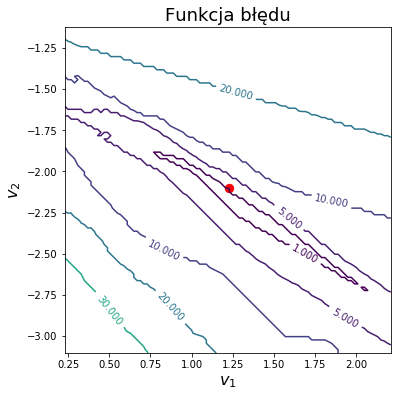

In [227]:
delta = 0.02 # skok siatki w v1 i v2
ran=1 # zasięg rysowania wokół optymalnego punktu

v1 = np.arange(v1_opt-ran,v1_opt+ran, delta) # siatka w v1
v2 = np.arange(v2_opt-ran,v2_opt+ran, delta) # siatka w v2
X, Y = np.meshgrid(v1, v2) 

Z=np.array([[blad(v1[i],v2[j],probka,-1) for i in range(len(v1))] for j in range(len(v2))]) # wartości B(v1,v2) 

fig, ax = plt.subplots(figsize=(6,6))

CS = ax.contour(X, Y, Z, [1,5,10,20,30,40,50])
ax.clabel(CS, inline=1, fontsize=10)

ax.set_title('Funkcja błędu', fontsize=18)
ax.set_aspect(aspect=1)
ax.set_xlabel('$v_1$', fontsize=16)
ax.set_ylabel('$v_2$', fontsize=16)

ax.scatter(v1_opt, v2_opt, s=70,c='red'); # nasz znaleziony optymalny punkt

# ax.scatter(1, -2, s=70,c='blue'); # prawdziwe minimum!

Powyżej widzimy, że znaleziony optymalny punkt jest blisko minimum funkcji błędu. Spróbujmy znaleźć to minimum na oko:

In [228]:
blad(1,-2,probka,-1)

0

Na wykresie widzimy wąską dolinę, wzdłuż której mamy (skorelowane) wartości $v_1$ i $v_2$ dajace rozwiązanie bliskie prawdiwemu, tj. $v_1=1$, $v_2=2$ (tak była generowana próbka).

## Ciągła funkcja wzbudzenia

Wracając jeszce do powyższego wykresu konturowego widzimy, że poziomice są "poząbkowane". Wynika to z faktu, że funkcja błędu przylmuje wartości całkowite. Jest więc nieciągła i, co za tym idzie, nieróżniczkowalna.

In [229]:
print(Z)

[[37 37 37 ...  7  7  7]
 [37 37 37 ...  7  7  7]
 [37 37 37 ...  7  7  6]
 ...
 [22 22 22 ... 26 26 26]
 [22 22 24 ... 26 26 26]
 [24 24 24 ... 26 26 26]]


Ta nieciągłość na rzecz jasna swoje źródło w użytej nieciągłej funkcji aktywacji, która jest funkcją schodkową. Mając na uwadze techniki, które poznamy niebawem, dobrze jest użyć ciągłej funkcji aktywacji. Historycznie, używano tzw. **sigmoidu**:

$\sigma(s)=\frac{1}{1+\exp(-s)}$

In [230]:
# sigmoid, inaczej funkcja logistyczna, a także (1+arctanh(-s/2))/2 
def sig(s):
    return 1/(1+np.exp(-s))

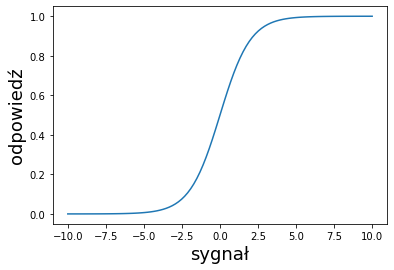

In [231]:
s = np.linspace(-10, 10, 100)

fs = [sig(z) for z in s]

plt.xlabel('sygnał',fontsize=18)
plt.ylabel('odpowiedź',fontsize=18)

plt.plot(s, fs);

Funkcja ta jest oczywiście różniczkowalna. Co więcej, 

$\sigma'(s)=\sigma(s)[1-\sigma(s)]$,

co jest jej szczególną cechą.

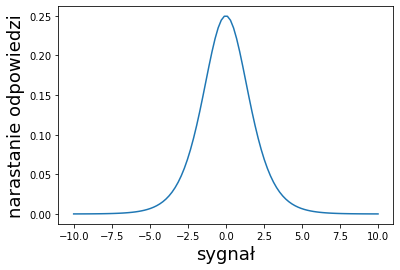

In [232]:
# pochodna sigmoidu
def dsig(s):
     return sig(s)*(1-sig(s)) # szczególna cecha tej funkcji
    
s = np.linspace(-10, 10, 100)
dfs = [dsig(z) for z in s]

plt.xlabel('sygnał',fontsize=18)
plt.ylabel('narastanie odpowiedzi',fontsize=18)

plt.plot(s, dfs);    

Wprowadza się też sigmoid z "temperaturą" $T$ (nomenklatura ta wiąże się z podobnymi wyrażeniami dla funkcji termodynamicznych w fizyce)

$\sigma(s)=\frac{1}{1+\exp(-s/T)}$.

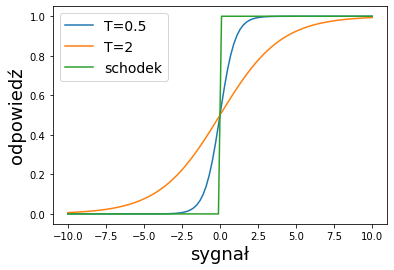

In [233]:
# sigmoid z "temperaturą" T
def sig_T(s,T):
    return 1/(1+np.exp(-s/T))

s = np.linspace(-10, 10, 100)
fs = [sig_T(z,.5) for z in s]
plt.plot(s, fs)

fs = [sig_T(z,2) for z in s]
plt.plot(s, fs)

fss = [f(z) for z in s]
plt.plot(s, fss)


plt.legend(('T=0.5','T=2','schodek'),fontsize=14)

plt.xlabel('sygnał',fontsize=18)
plt.ylabel('odpowiedź',fontsize=18);


Dla coraz mniejszych $T$ funkcja zbliża się do używanej dotychczas funkcji schodkowej.

Zauważmy jednak, że argumentem sigmoidu jest de facto iloraz

$s/T=(w_0+w_1 x_1 +w_2 x_2)/T = w_0/T + w_1/T \, x_1 + w_2/T \, x_2 = v_0+v_1 x_1 +v_2 x_2$, 

co oznacza, że możemy bez straty ogólności zawsze przyjąć $T=1$ ($T$ jest "skalą"), ale mamy teraz do czynienia z trzema niezależnymi argumentami $v_0$, $v_1$ i $v_2$. Nie da się wyredukować sytuacji do dwóch niezależnych parametrów, jak to miało miejsce dla funkcji schodkowej.

Poniżej będziemu zatem używać $T=1$.

## Perceptron z sigmoidem wzbudzenia

Powtórzymy teraz nasz przykład z klasyfikatorem punktów, ale dla funkcji wzbudzenia danej sigmoidem. Na początek wystarczy zastąpić funkcje $f$ funkcją $\sigma$:

In [234]:
def teach_perceptron_s(probka, eps, w_in): # dodajemy temperaturę
    [[w0],[w1],[w2]]=w_in # początkowe wagi
    for ind in range(len(probka)): # pętla po punktach z próbki, ind jest numerem punktu
        for k in range(0,9):       # dla każdego punktu powtarzamy 10 razy
            
            y=sig(w0+w1*probka[ind,0]+w2*probka[ind,1]) # odpowiedź dla danego punktu
            
            # uaktualnienie wag
            w0=w0+eps*(probka[ind,2]-y)*1
            w1=w1+eps*(probka[ind,2]-y)*probka[ind,0]
            w2=w2+eps*(probka[ind,2]-y)*probka[ind,1]
    return [[w0],[w1],[w2]]

Poniżej widzimy dążenie tego algorytmu do optimum.

In [235]:
wagi=[[random.random()-0.5], [random.random()-0.5], [random.random()-0.5]] # inicjalizacja (losowych) wag
 
for r in range(15): # powtórz 15 razy
    wagi=teach_perceptron_s(probka,.7/(r*r+1),wagi) # temeperatura T=0.3
    print(wagi)                 

[[-4.5036791645491805], [-5.2233183980834745], [10.046514435747806]]
[[-5.2294393623325615], [-6.52013924775131], [12.237540618054615]]
[[-5.861482404814656], [-7.1194114737658385], [12.697242637376359]]
[[-6.050609134254186], [-7.326530720677519], [13.008540573505364]]
[[-6.121952881352125], [-7.414905308662269], [13.219089284254009]]
[[-6.170012033521541], [-7.468554141722708], [13.354546597202047]]
[[-6.206616421547679], [-7.506095714441848], [13.446793869576428]]
[[-6.235021591578022], [-7.533973352234457], [13.513511323304527]]
[[-6.257451739025646], [-7.555482928268343], [13.564025250407228]]
[[-6.27549957066046], [-7.572569018053632], [13.603614881011344]]
[[-6.290283166213971], [-7.586460898158337], [13.635485777846172]]
[[-6.3025891981426865], [-7.597973366340084], [13.66169816569723]]
[[-6.3129789922343145], [-7.607667126957234], [13.683637582357187]]
[[-6.321860396771262], [-7.61594024393409], [13.702270710292362]]
[[-6.329535344400625], [-7.623082894744837], [13.71829279158

Przy użyciu sigmoidu musimy jednak inaczej zdefiniować funkcję błędu, bo odpowiedź nigdy nie jest "zero-jedynkowa", jak to było w przypadku funkcji schodkowej. Zazwyczaj używa się sumy kwadratów różnic odpowiedzi uzyskanych i prawdziwych, tj.

$B=\sum_p (y_u^{(p)}-y_t^{(p)})^2$.

Wskaźnik $(p)$ oznacza tutaj wartość dla danego punktu $p$ z próbki szkoleniowej.
Zauważmy, że dla funkcji schodkowej ta definicja redukuje się do używanej poprzednio. Ponieważ dla danego punktu o współrzędnych $(x_1^{(p)},x_2^{(p)})$

$y_u^{(p)}=\sigma(w_0+w_1 x_1^{(p)} +w_2 x_2^{(p)})$, 

możemy zapisać 

$B(w_0,w_1,w_2)=\sum_p [\sigma(w_0+w_1 x_1^{(p)} +w_2 x_2^{(p)})-y_t^{(p)}]^2$.

In [236]:
def bl_s(w0, w1, w2 ,probka):
    s=0
    for ind in range(len(probka)): # pętla po punktach z próbki, ind jest numerem punktu 
        a=sig(w0+w1*probka[ind,0]+w2*probka[ind,1])-probka[ind,2]
        s+=a*a
    return s

In [237]:
ww0, ww1, ww2 = -6, -7, 13
bl_s(ww0, ww1, ww2, probka)

2.6471118226034784

Funkcja błędu ma teraz 3 argumenty, więc nie można jej narysować w dwóch wymiarach. Możemy jedynie popatrzeć na jej rzuty np. przy ustalonej wartości $w_0$.

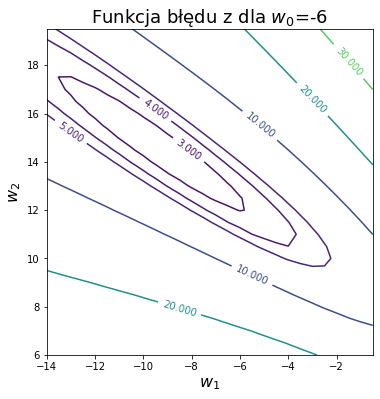

In [238]:
delta = 0.5 # skok siatki w v1 i v2
ran=7 # zasięg rysowania wokół optymalnego punktu
v1 = np.arange(ww1-ran,ww1+ran, delta) # siatka w v1
v2 = np.arange(ww2-ran,ww2+ran, delta) # siatka w v2
X, Y = np.meshgrid(v1, v2) 

Z=np.array([[bl_s(ww0,v1[i],v2[j],probka) for i in range(len(v1))] for j in range(len(v2))]) # wartości B(v1,v2) 

fig, ax = plt.subplots(figsize=(6,6))

CS = ax.contour(X, Y, Z,[1,2,3,4,5,10,20,30,40])
ax.clabel(CS, inline=1, fontsize=10)

ax.set_title('Funkcja błędu z dla $w_0$='+str(ww0), fontsize=18)
ax.set_aspect(aspect=1)
ax.set_xlabel('$w_1$', fontsize=16)
ax.set_ylabel('$w_2$', fontsize=16);


## Metoda znajdowania minimum funkcji wielu zmiennych metodą najstromszego spadku (analiza matematyczna się kłania)

Dla różniczkowalnej funkcji wielu zmiennych, $F(w_1, w_2, ..., w_n)$ lokalnie najstromszy spadek określony jest przez minus gradient funkcji $F$, tj. spadek ten zachodzi w kierunku

$-(\partial F/\partial w_1, \partial F/\partial w_2, ..., \partial F/\partial w_n)$,

gdzie pochodne cząstkowe są zdefiniowane jako granica 

$\partial F/\partial w_1 = \lim_{\Delta \to 0} \frac{F(w_1+\Delta, w_2, ..., w_n)-F(w_1, w_2, ..., w_n)}{\Delta}$

i podobnie dla innych $w_i$.

Metoda znajdowania minimum funkcji metodą najstromszego spadku dana jest przez iteracyny algorytm, gdzie w każdym kroku uaktualniamy położenie 

$w_{i+1} = w_i - \epsilon  \, \partial F/\partial w_i$. 




In [239]:
# do nakładania wykresów na siebie
%config InlineBackend.close_figures=False # keep figures open in pyplot

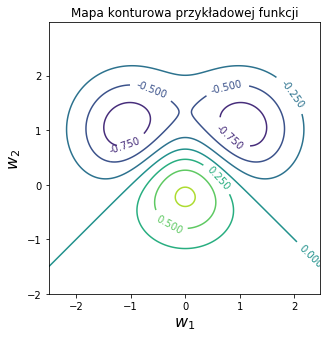

In [240]:
# przykładowa funkcja dwóch zmiennych
def ft(X,Y):
    return np.exp(-X**2 - Y**2)-np.exp(-(X - 1)**2 - (Y - 1)**2) - np.exp(-(X + 1)**2 - (Y - 1)**2)

delta = 0.025
x = np.arange(-2.5, 2.5, delta)
y = np.arange(-2.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z = ft(X,Y)

fig, ax = plt.subplots(figsize=(5,5))

CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Mapa konturowa przykładowej funkcji', fontsize=12)
ax.set_aspect(aspect=1)
ax.set_xlabel('$w_1$', fontsize=16)
ax.set_ylabel('$w_2$', fontsize=16);

Powyższa funkcja ma dwa minima i jedno maksimum.

Numeryczna definicja gradientu. Zauważ, że nazwa funkcji (tutaj ff), moze być argumentem (!)

In [241]:
def grad(ff,x,y,eps):
    return (ff(x+eps,y)-ff(x,y))/eps, (ff(x,y+eps)-ff(x,y))/eps

In [242]:
grad(ft,1,2,.1)

(0.04650495076211458, 0.6869212826526255)

## Ilustracja metody najstromszego spadku

In [243]:
x0,y0=-1.5,2.7 # punkt początkowy

xt, yt=[], [] # tablice kolejnych punktów

# iteracje
for i in range(20):  # powtórz 20 razy
    xs,ys=grad(ft,x0,y0,.05) # gradient
    x0-=0.4*xs               # uaktualnienie współrzędnych z eps=0.4
    y0-=0.4*ys
    xt.append(x0)
    yt.append(y0)
    print(i+1, np.round(x0,3), np.round(y0,3), np.round(xs,4), np.round(ys,4),ft(x0,y0))

# format:

# krok x   y       dx    dy       F(x,y)

1 -1.483 2.645 -0.0425 0.1372 -0.05291638954327062
2 -1.463 2.58 -0.05 0.1626 -0.06650675994830575
3 -1.439 2.501 -0.0601 0.197 -0.0866236602755094
4 -1.409 2.403 -0.074 0.2448 -0.11800456523023042
5 -1.372 2.278 -0.0935 0.3134 -0.16991479727684713
6 -1.323 2.112 -0.1214 0.4137 -0.2605728309152377
7 -1.26 1.89 -0.1595 0.5569 -0.42057716896090747
8 -1.18 1.6 -0.1997 0.7253 -0.6626080030475462
9 -1.103 1.292 -0.1927 0.768 -0.8636739748863785
10 -1.076 1.118 -0.0657 0.4368 -0.9037275010306927
11 -1.092 1.083 0.0383 0.0872 -0.9033324566590267
12 -1.101 1.076 0.0224 0.0167 -0.9027214370077301
13 -1.104 1.074 0.0073 0.0054 -0.90247700224876
14 -1.105 1.073 0.0024 0.0018 -0.9023929025078842
15 -1.105 1.073 0.0008 0.0006 -0.9023651486198875
16 -1.105 1.073 0.0002 0.0002 -0.9023561061994864
17 -1.105 1.073 0.0001 0.0001 -0.9023531721254311
18 -1.105 1.073 0.0 0.0 -0.9023522213329095
19 -1.105 1.073 0.0 0.0 -0.9023519133578046
20 -1.105 1.073 0.0 0.0 -0.902351813614066


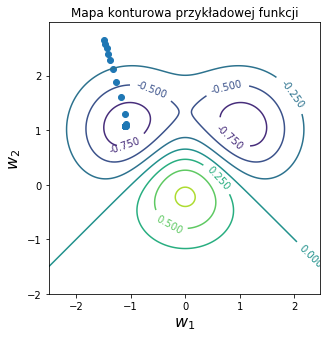

In [244]:
plt.scatter(xt,yt)
plt.show()

In [245]:
plt.close()

Powtórz powyższe dla innego warunku początkowego.

In [246]:
%config InlineBackend.close_figures=True # close figures

# Zastosowanie metody najstromszego spadku do naszego klasyfikatora

In [247]:
w00,w10, w20= -5, -6, 10 # punkt początkowy

w0t, w1t, w2t =[], [], [] # tablice kolejnych punktów

Delta=0.05 # krok do numerycznego obliczania gradientu

epsi=0.5

# iteracje
for i in range(200):  # powtórz 40 razy
    
    dw0=(bl_s(w00+Delta, w10, w20, probka)-bl_s(w00, w10, w20, probka))/Delta # gradient w kierunku w0
    dw1=(bl_s(w00, w10+Delta, w20, probka)-bl_s(w00, w10, w20, probka))/Delta # gradient w kierunku w1
    dw2=(bl_s(w00, w10, w20+Delta, probka)-bl_s(w00, w10, w20, probka))/Delta # gradient w kierunku w2
    
    w00-=epsi*dw0  # uaktualnianie wag     
    w10-=epsi*dw1 
    w20-=epsi*dw2
    
    w0t.append(w00) # zapamietywanie aktualnych wag 
    w1t.append(w10)
    w2t.append(w20)
    
    if(i%10==9): # drukuj co 10 iteracji
        print(i+1, np.round(w00,3), np.round(w10,3), np.round(w20,3),bl_s(w00, w10, w20, probka))

# format:

# krok w0    w1    w2   błąd(w0, w1, w2)

10 -6.895 -7.678 11.659 9.162840255017127
20 -7.53 -8.074 13.73 5.450750579491571
30 -8.073 -8.425 15.033 4.2438731894690624
40 -8.431 -8.912 15.95 3.776540153755912
50 -8.691 -9.415 16.706 3.4636428920492373
60 -8.897 -9.881 17.37 3.1860453747630473
70 -9.067 -10.291 17.969 2.913411749244585
80 -9.211 -10.638 18.514 2.643097065708097
90 -9.334 -10.922 19.009 2.382728159443613
100 -9.438 -11.15 19.461 2.1434876700318184
110 -9.526 -11.328 19.874 1.9376582781761513
120 -9.604 -11.47 20.254 1.7772089708050096
130 -9.677 -11.591 20.605 1.6695886677683915
140 -9.758 -11.707 20.926 1.6091521004421976
150 -9.855 -11.83 21.22 1.5765847449670882
160 -9.966 -11.961 21.491 1.55436533843868
170 -10.083 -12.095 21.747 1.5352111693159731
180 -10.199 -12.228 21.994 1.5173473090643055
190 -10.314 -12.359 22.235 1.5003813248666136
200 -10.426 -12.488 22.471 1.4841895550255804


In [248]:
ww0, ww1, ww2 = w00, w10, w20
bl_s(ww0, ww1, ww2, probka)

1.4841895550255804

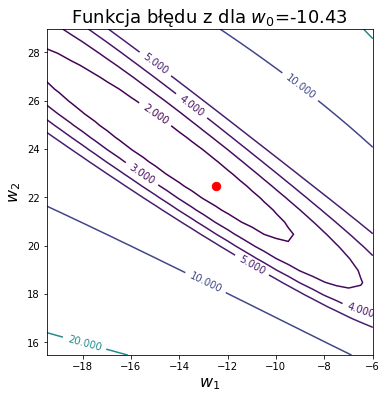

In [249]:
# ten sam kawałek kodu, co uprzednio

delta = 0.5 # skok siatki w v1 i v2
ran=7 # zasięg rysowania wokół optymalnego punktu
v1 = np.arange(ww1-ran,ww1+ran, delta) # siatka w v1
v2 = np.arange(ww2-ran,ww2+ran, delta) # siatka w v2
X, Y = np.meshgrid(v1, v2) 

Z=np.array([[bl_s(ww0,v1[i],v2[j],probka) for i in range(len(v1))] for j in range(len(v2))]) # wartości B(v1,v2) 

fig, ax = plt.subplots(figsize=(6,6))

CS = ax.contour(X, Y, Z,[2,3,4,5,10,20,30,40])
ax.clabel(CS, inline=1, fontsize=10)

ax.set_title('Funkcja błędu z dla $w_0$='+str(round(ww0,2)), fontsize=18)
ax.set_aspect(aspect=1)
ax.set_xlabel('$w_1$', fontsize=16)
ax.set_ylabel('$w_2$', fontsize=16)


ax.scatter(w10, w20, s=70,c='red'); # nasz znaleziony optymalny punkt

Nie działa idealnie!

Problemy ze znajdowaniem minimum funkcji wielu zmiennych są dobrze znane:

- Mogą występować lokalne minima, w zwiazku z czym może być trudno znależć minimum globalne (por. przykład powyżej z funkcją a dwóch minimach).

- Minimum może być w nieskończoności (czyli matematycznie nie istnieć).

- Funkcja w okolicy minimum może byc bardzo płaska, zatem gradient bardzo mały, wobec czego uaktualnianie w metodzie najstromszego spadku zachodzi niezwykle powoli.

- Skończona dokładność numeryczna może być problemem.

Ogólnie, numeryczna minimalizacja funkcji do sztuka!


W naszym ostatnim przypadku mamy tak naprawdę sytuację minimum, które "ucieka" do nieskonczoności. Pamiętacie sigmoid z temperaturą, którego argumentem jest $(w_0+w_1 x_1 + w_2 x_2)/T$. Funkcja schodkowa, czyli $T \to 0$, jest w stanie dokładnie rozdzielić punkty próbki, zatem system chce, by $T$ było jk najmniejsze. Wówczas wielkość parametrów $v_i=w_i/T$ dąży do nieskończoności. Widać to, jeśli powyższy algorytm puścimy z bardzo dużą liczbą iteracji.

Czy taki problem przeszkadza? Niekoniecznie, jeśli chcemy mieć przybliżone rozwiązanie. Ale trzeba sobie z niego zdawać sprawę.

## Działanie wytrenowanej sieci (z sigmoidem) na nowych punktach

In [250]:
for i in range(30):
    x1, x2=random.random(), random.random() # nowy punkt testowy
    print(round(x1,3),round(x2,3), round(sig(ww0+ww1*x1+ww2*x2),3),x2>1/2 + x1/2)
                                       # ten sam warunek, co przy generowaniu próbki
    
# format:
# x1    x2  sig(s) klasyfikacja

0.767 0.451 0.0 False
0.311 0.178 0.0 False
0.787 0.86 0.282 False
0.679 0.407 0.0 False
0.017 0.197 0.002 False
0.342 0.446 0.009 False
0.177 0.768 0.99 True
0.492 0.387 0.0 False
0.858 0.525 0.0 False
0.292 0.175 0.0 False
0.482 0.457 0.002 False
0.415 0.709 0.579 True
0.538 0.703 0.206 False
0.142 0.347 0.012 False
0.017 0.278 0.012 False
0.775 0.316 0.0 False
0.352 0.568 0.114 False
0.66 0.182 0.0 False
0.88 0.95 0.482 True
0.027 0.084 0.0 False
0.708 0.33 0.0 False
0.523 0.704 0.24 False
0.821 0.022 0.0 False
0.973 0.136 0.0 False
0.463 0.289 0.0 False
0.892 0.09 0.0 False
0.263 0.538 0.166 False
0.437 0.298 0.0 False
0.612 0.711 0.11 False
0.55 0.305 0.0 False


Dołożenie filtra z progiem 0.5 daje rozsądnie działającą sieć. Przekłamania są na poziomie 1%.

In [251]:
erx, ery = [], []  # tablice współrzędnych będnie sklasyfikowanych punktów
for i in range(1000):                       # próbka testowa o 1000 punktów
    x1, x2=random.random(), random.random() # losowy punkt
    c1=x2>1/2 + x1/2                        # warunek do klasyfikacji
    c2=sig(ww0+ww1*x1+ww2*x2)>0.5           # uzyskana klasyfikacja
    if(c1!=c2):                             # jeśli błędnie sklasyfikowany
        print(round(x1,2),round(x2,2))          # wypisz współrzędne
        erx.append(x1)                          # zapamiętaj je w tablicach
        ery.append(x2)
        

0.12 0.53
0.09 0.53
0.29 0.63
0.77 0.89
0.59 0.79
0.01 0.5
0.04 0.5
0.41 0.7
0.14 0.55
0.32 0.64
0.89 0.95
0.23 0.6
0.06 0.51
0.14 0.57
0.26 0.62
0.97 0.99
0.9 0.96
0.93 0.97
0.24 0.61


In [252]:
# linia rozdzielająca (było wcześniej)
def l2(w0,w1,w2):
    return [-.1,1.1],[-(w0-w1*0.1)/w2,-(w0+w1*1.1)/w2]

Poniżej widzimy, że punkty źle sklasyfikowane (przekłamania) leżą w pobliżu linii rozdzielajacej (co nas oczywiście nie dziwi!). Dokładność można polepszyc stosując większą próbkę szkoleniową.

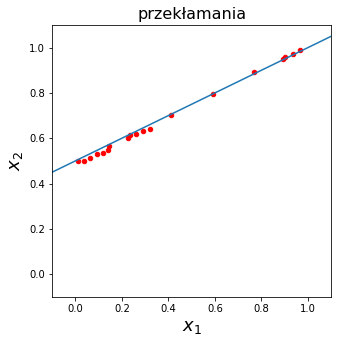

In [253]:
lin=l2(1,1,-2)

plt.figure(figsize=(5,5))
plt.title("przekłamania",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(erx,ery,s=20,c='red')
plt.plot(lin[0],lin[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

## **Uwaga dot. pochodnej naszej funkcji błędu**

Mamy funkcję błedu określoną jako sumę po wszystkich punktach próbki szkoleniowej

$B(w_0,w_1,w_2)= \sum_p [y_u^{(p)}-y_t^{(p)}]^2=\sum_p [\sigma(s^{(p)})-y_t^{(p)}]^2 $,

gdzie

$s^{(p)}=w_0  x_0^{(p)}+w_1 x_1^{(p)} +w_2 x_2^{(p)}$,

zatem 

$\partial B/\partial w_i= \sum_p 2[\sigma(s^{(p)})-y_t^{(p)}]\, \sigma'(s^{(p)}) \,x_i^{(p)} = \sum_p 2[\sigma(s^{(p)})-y_t^{(p)}]\, \sigma(s^{(p)})\, [1-\sigma(s^{(p)})] \,x_i^{(p)}$

(pochodna f. kwadratowej $\times$ pochodna sigmoidu $\times$ pochodna $s^{(p)}$).

Tak więc metoda najstromszego spadku prowadzi do uaktualniania wag naszego neuronu (przy użyciu danego punktu $p$ o współrzędnych $x_i$)

$w_i \to w_i - \varepsilon (y_u^{(p)} -y_t^{(p)}) y_u^{(p)} (1-y_u^{(p)}) x_i$.

Zauważmy, że uaktuanianie zachodzi zawsze, ponieważ uzyskana odpowiedź $y_u^{(p)}$ nie jest dla sigmoidu nigdy równa 0 ani 1, podczas gdy 
prawdziwa wartość $y_u^{(p)}$ jest 0 lub 1.  

Ponieważ $y_u^{(p)} (1-y_u^{(p)})=\sigma(s^{(p)}) [1-\sigma(s^{(p)})]$ jest niezerowe tylko w okolicy $y^{(p)}=0$ (zob. wcześniejszy wykres pochodnej sigmoidu), uaktualnianie zachodzi tylko "w pobliżu progu". Jest to OK, bo przekłamania są właśnie w pobliżu linii rozdzielajacej.


Dla porównania, wcześniejszy algorytm uczenia perceptronu z funkcją schodkową miał postać strukturalnie podobną,

$w_i \to w_i - \varepsilon \,(y_u^{(p)} - y_t^{(p)}) \, x_i$,

ale uaktualnianie zachodzi tutaj dla wszystkich punktów (i tylko, jeśli jest błędna odpowiedź), nie tylko w okolicy progu.

## Zadanie

1) Zmodyfikować kod ilustrujący działanie algorytmu trenowania tak, aby zamiast/oprócz sieci rysował punkty próbki i aktualną linię rozdzielającą, podobnie jak wykładzie 3 (należy w prosty sposób rozszerzyć kod w komórce pod nagłowkiem **Zebranie powyższych kroków w całość**).

2) (większe) Rozważ jednowymiarowy wariant klasyfikatora punktów:
 - Wygeneruj losową próbkę punktów na osi liczbowej $x$. Jeśli współrzędna $x_i>a$, gdzie $a$ jest (znanym Ci) punktem rozdzielającym, np. $a=0.5$, przypisz do $x_i$ liczbę kontrolną 1, a w przeciwnym przypadku przypisz 0.
 - Zrób grafikę.
 - Weź perceptron o inpucie $(1,x)$ (ile ma wag, tj. niezależnych parametrów?) i wytrenuj go na swojej próbce. Jaką przybliżoną wartość dla $a$ znalazłeś?
 - Dodaj $a$ do grafiki.

3) Wykaż, obliczając pochodną, że $\sigma'(s)=\sigma(s)[1-\sigma(s)]$

(proszę policzyć ręcznie na karce paperu i załączyć grafikę do notebooka jupytera).

4) Dla zad. 2 dobierz metodą prób i błędów szybkość uczenia $\varepsilon$ w możliwie dobry sposób. Ponadto zobacz, jak dokładność zmienia się z liczebnością próbki szkoleniowej.


# Wykład 5 - więcej warstw

Rozważany w poprzednich wykładach klasyfikator liniowo separowalnego zbioru punktów na płaszczyźnie sprowadzał się do pojedynczego neuronu. Jeśli znamy warunek rozdzielający punkty, który jest postaci 

$w_0+w_1 x_1 +w_2 x_2>0$, 

tj. znamy wagi $w_0$, $w_1$, $w_2$, to możemy je zadać w perceptronie a priori, tzn. bez żadnego uczenia.
Jest to dość szczególna sytuacja, ale np. ja wymyślając zadanie dla Państwa w oczywisty sposób wiedziałem, jak te punkty generuję.

Na przykład warunek $x_2>\frac{1}{2} + \frac{1}{2} x_1$ dla punktów różowych (i przeciwny dla niebeiskich) ma postać $x_2>1/2 + 1/2 x_1$, czyli

$-\frac{1}{2} -\frac{1}{2} x_1 +x_2 > 0$, 

tak więc $w_0=-\frac{1}{2}$, $w_1=-\frac{1}{2}$ i $w_2=1$. Możemy te wagi wpisać do naszego perceptronu. Zrobienie propagacje do przodu dla danego punktu inputowego da na outpucie liczbę określającą jego kolor, tj. czy leży nad (1) czy pod (0) linią rozdzielającą. 

In [254]:
def inp(): # input
    return [1,random.random(), random.random()] # 1 (input progowy) i dwie losowe współrzędne

In [255]:
p=inp()

In [256]:
# przykładowy input
p

[1, 0.7680742726393737, 0.02628268861036165]

In [257]:
# Propagacja do przodu w perceptronie 
# z warstwą inputową o 3 wejściach i 2 wyjściach (z czego jedno jest nieistotnym progiem).
# Wagi są wpisane wg komentarza powyżej.

out=feed_forward([3,2],{1:[[-0.5],[-0.5],[1]]},p)
out

{0: array([1.        , 0.76807427, 0.02628269]), 1: array([1, 0])}

In [258]:
# Możemy input generować losowo poprzez inp(p)
ff=feed_forward([3,2],{1:[[-0.2],[-0.5],[1]]},inp())
ff

{0: array([1.        , 0.13898885, 0.41329089]), 1: array([1, 1])}

In [259]:
# Z tego wyniku możemy "wyłowić" współrzędne punktu i jego klasyfikację (0 lub 1):
pt=[ff[0][1],ff[0][2],ff[1][1]]
pt

[0.13898884612723594, 0.41329088873180697, 1]

In [260]:
# Możemy to skomasować w funkcji:
def pun():
    ff=feed_forward([3,2],{1:[[-0.5],[-0.5],[1]]},inp())
    return [ff[0][1],ff[0][2],ff[1][1]]   

In [261]:
pun() # współrzędne i klasyfikacja: 1-różowy, 0-niebieski

[0.9707803722245764, 0.25042002361602844, 0]

In [262]:
# Teraz wygenerujemy większą próbkę 
probka=np.array([pun() for i in range(400)])

In [263]:
# linia do grafiki (było wcześniej)
def l2(w0,w1,w2):
    return [-.1,1.1],[-(w0-w1*0.1)/w2,-(w0+w1*1.1)/w2]

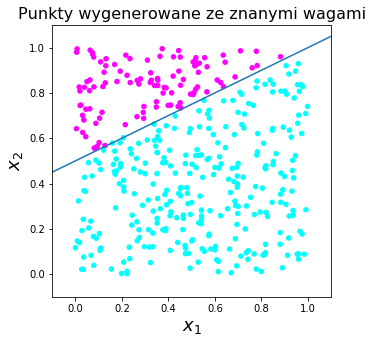

In [264]:
plt.figure(figsize=(5,5))
plt.title("Punkty wygenerowane ze znanymi wagami",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(probka[:,0],probka[:,1],c=probka[:,2],
            s=20,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

lin=l2(0.5,0.5,-1)
plt.plot(lin[0],lin[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

## Więcej warunków

Teraz wyznaczmy sobie ogólniejsze zadanie. Chcemy, żeby klasyfikacja była oparta o jednoczesne dwa warunki, np. chcemy aby, jak dotąd $x_2>\frac{1}{2} + \frac{1}{2} x_1$ dla punktów niebieskich, ale oprócz tego by był dla nich spełniony warunek $x_1<0.6$. Jak to zrobić?

Geometrycznie widzimy, że z pojedyczym neuronem zrobić się tego nie da, bo pojedynczy neuron generuje jedna linię rozdzielającą, a teraz potrzebujemy dwóch oraz koniunkcji warunków

$-\frac{1}{2} -\frac{1}{2} x_1 +x_2 > 0$ oraz $0.6-x_1>0$.

Nie ma sensu podłączać tego sam inputu do dwóch synaps (węzłów inputowych(. Na przykład, gdyby $x_1$ dawało input na dwóch synapsach, to wkład do sygnału byłby $x_1$ razy suma wag tych synaps. Możemy więc zastąpić dwie synapsy jedną o ich sumarycznej wadze. Nie wolno też na inpucie mieć np. $x_i^2$, bo to jest wbrew regłom gry. Input ma być liniowy. 

Chwila zastanowienia podpowiada nam, że abu rozwiązać nasz problem należy wykorzystać jeden neuron do pierwszego warunku, drugi do drugiego, a ich outputy połączyć koniunkcją tak, jak robiliśmy na pierwszym wykładzie. Sieć będzie więc miała postać

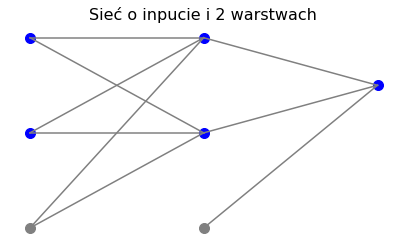

In [265]:
plot_net([3,3,2])

Wagi (miedzy inputem i warstwą pośrednią, oznaczone górnym wskaźnikiem $1$) dla pierwszego warunku są (tak jak w poprzednim przykładzie)

$w_{01}^1=-\frac{1}{2}, \, w_{11}^1=-\frac{1}{2}, \, w_{21}^1=1$,

a dla drugiego warunku

$w_{01}^1=0.6, \, w_{11}^1=-1, \, w_{21}^1=0$.

Wagi pomiędzy warstwą pośrednią a outputem (oznaczone górnym wskaźnikiem $2$) odpowiadają koniunkcji, możemy je zatem przyjąć jako (zob. piewszy wykład)

$w_{01}^2=-1, \, w_{11}^2=0.6, \, w_{21}^2=0.6$.



In [266]:
wagi={1:[[-0.5,0.6],[-0.5,-1],[1,0]], 2:[[-1],[0.6],[0.6]]}

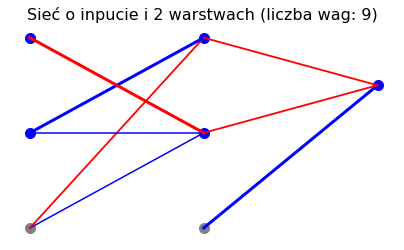

In [267]:
plot_net_w([3,3,2],wagi)

Zobaczmy, jak taka sieć zadziała:

In [268]:
feed_forward([3,3,2],wagi,inp())

{0: array([1.        , 0.23353139, 0.36523291]),
 1: array([1, 0, 1]),
 2: array([1, 0])}

In [269]:
def pun2():
    ff=feed_forward([3,3,2],wagi,inp())
    return [ff[0][1],ff[0][2],ff[2][1]]   

In [270]:
probka=np.array([pun2() for i in range(3000)])

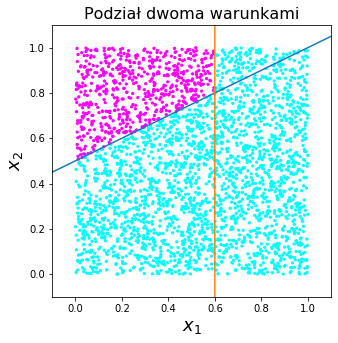

In [271]:
plt.figure(figsize=(5,5))
plt.title("Podział dwoma warunkami",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(probka[:,0],probka[:,1],c=probka[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

lin=l2(0.5,0.5,-1)
plt.plot(lin[0],lin[1])

lin2=l2(0.6,-1,0.00001)
plt.plot(lin2[0],lin2[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

Powyżej widzimy, że podział jest dokładny (co jest oczywiste).

## Propagacja wsteczna dla perceptronu z jedną warstwą pośrednią

Poniższy materiał jest absolutnie **kluczowy** dla zrozumienia tej bardzo ważnej idei uczenia sieci neuronowych. Jednocześnie może być on dość trudny dla osób słabiej obeznanych z analizą matematyczną, pojawią się bowiem wyprowadzenia i wzory z bogatą notacją. Nie da się tego jednak przedstawić prościej niz poniżej z zachowaniem niezbędnej ścisłości.

W powyższym przykładzie wiedzieliśmy z góry, jakim przepisem generujemy punkty, więc w tej szczęśliwej i rzadkiej sytuacji mogliśmy ustalić wagi w dokładny sposób po prostym rozumowaniu. W ogólnym przypadku tak nie jest. Podobnie jak dla pojedynczego neuronu w poprzednim wykładzie, chcemy zatem wytrenować naszą sieć na próbce szkoleniowej. Różnica polega na tym, że teraz są dwie warsty (oprócz inputu) i dwa zestawy wag: miedzy inputem i warstwą pośrednią oraz miedzy warstwą pośrednią i outputem.

Metoda, którą tutaj krok po kroku wyprowadzimy i która jest słynnym **algorytmem propagacji wstecznej**  [Arthur E. Bryson, Yu-Chi Ho, 1969] dla uaktualniania wag sieci wielowarstwowej, korzysta z dwóch składników:

- **metody najstromszego spadku**, wyjaśnionej w poprzednim wykładzie oraz
- znanego Ci z analizy matematycznej **twierdzenia o pochodnej funkcji złożonej**.

Zanim przejdziemy do wyprowadzenia algorytmu, najpierw dla sieci o jednej warstwie pośredniej i pojedynczym neuronie w warstwie outputowej (tak, jak w przykładzie powyżej), musimy wprowadzić odpowiednią notację. Robimy to "programistycznie", adaptując ecześniejszy kod tak, aby wypisywał odpowiednie etykiety.

In [272]:
def plot_net_lab(n_war, wagi, x):
    """Narysuj sieć z etykietami"""
    li_war=len(n_war)
    plt.figure(figsize=(9,5)) # rozmiar rysunku

    for i in range(li_war): # pętla po warstwach
        for j in range(1,n_war[i]): # pętla po węzłach innych niż progowe w warstwie (zaczynamy od 1)
            plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
            lab=x[i][j]
            plt.text(i+0.1, j-n_war[i]/2+0.1, lab, fontsize=16)
    
    for i in range(li_war): # pętla po warstwach z wyjatkiem outputowej
            plt.scatter(i, 0-n_war[i]/2, s=100,c='gray') # dodaj węzły progowe innym kolorem
            lab=x[i][0]
            plt.text(i+0.1, 0-n_war[i]/2+0.1, lab, fontsize=16)
   
    for i in range(li_war-1):
        for j in range(n_war[i]):
            for k in range(n_war[i+1]-1):
                plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c='gray',linewidth=0.4)
                plt.text(i+0.75, 0.25*(j-n_war[i]/2)+0.75*(k+1-n_war[i+1]/2), wagi[i+1][j][k], fontsize=16)

    plt.axis("off")
    plt.show()

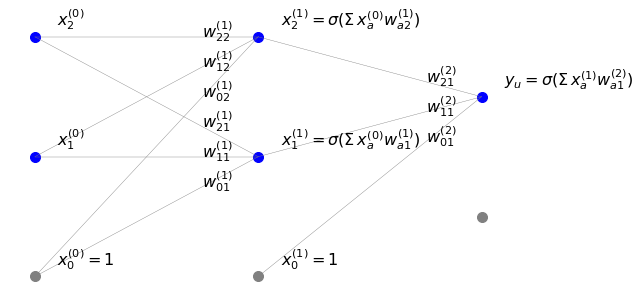

In [273]:
plot_net_lab([3,3,2],
             {1: [["$w_{01}^{(1)}$", "$w_{02}^{(1)}$"], ["$w_{11}^{(1)}$", "$w_{12}^{(1)}$"], 
                  ["$w_{21}^{(1)}$", "$w_{22}^{(1)}$"]], 
              2: [["$w_{01}^{(2)}$"], ["$w_{11}^{(2)}$"], ["$w_{21}^{(2)}$"]]} ,
             {0: np.array(["$x_0^{(0)}=1$","$x_1^{(0)}$","$x_2^{(0)}$"]), 
              1: np.array(["$x_0^{(1)}=1$","$x_1^{(1)}=\sigma(\Sigma \,x_a^{(0)} w_{a1}^{(1)})$",
                                           "$x_2^{(1)}=\sigma(\Sigma \,x_a^{(0)} w_{a2}^{(1)})$"]), 
              2: np.array(["","$y_u=\sigma(\Sigma \,x_a^{(1)} w_{a1}^{(2)})$"])})

Na rysunku powyżej wskaźniki dolne dla $x_\alpha^{(i)}$ oznaczają numer węzła w wartstwie $i$. Zauwążmy, że numerujemy je od lewej strony, począwszy od 0. Podobnie, w danej warstwie wierzchołki, idąc od dołu, numerowane są od 0. Jest to wygodne, bo taka sama konwencja przyjęta jest w indeksowaniu tablic w pythonie. 
Dla wag $w_{\alpha \beta}^{(i)}$ wskaźniki oznaczają, że 
odpowiada ona krawędzi prowadzącej od wierzchołka $\alpha=0,1,\dots$ w warstwie $(i-1)$ do wierzchołka $\beta=1,\dots$ w warstwie $i$.

Zgodnie z omówionym wcześniej modelem MCP, wchodzący do neuronu numer $\beta$ w warstwie $i$ sygnał, to suma ważona

$s_\beta^{(i)}=\sum_{\alpha=0} x_\alpha^{(i-1)}w_{\alpha \beta}^{(i)},  ~~~~ \beta=1,\dots$.

Jest on rzecz jasna argumentem funkcji aktywacji $\sigma$, która generuje sygnał wyjściowy z neuronu:

$x_\beta^{(i)}=\sigma(s_\beta^{(i)})=
 \sigma \left(\sum_\alpha x_\alpha^{(i-1)}w_{\alpha \beta}^{(i)}\right), ~~~~ \beta=1,\dots$
 
Dla $\beta=1$ (węzeł progowy) jest inaczej (patrz rysunek), 

$x_0^{(i)}=1$.

Uwaga: Używamy tutaj notacji dla sigmoidu, ale w ogólności $\sigma$ może oznaczać dowolną *różniczkowalną* funkcję aktywacji.


### Twierdzenie o pochodnej funkcji złożonej

Znane Co z analizy matematucznej twierdzenie o pochodnej funkcji złożonej mówi, że 

$[f(g(x))]' = f'(g(x)) g'(x)$.

Dla większej liczby złożonych funkcji mamy $[f(g(h(x)))]' = f'(g(h(x))) \,g'(h(x)) \,h'(x)$ itd.

Na tej "mądrości" zasadza się całe poniższe wyprowadzenie. Jest to więc koncepcja bardzo prosta, a pewna komplikacja zapisu wynika jedynie z mnogości zmiennych i oznaczania wskaźnikami ich lokalizacji w sieci.

### Pochodna funkcji błędu

Wprowadzona wcześniej funkcja błędu jest sumą po punktach próbki szkoleniowej i wynosi 

$B(\{w\})=\sum_p (y_u^{(p)}-y_t^{(p)})^2$, 

gdzie $\{w\}$ oznacza wszystkie wagi sieci.
Zajmiemy się przyczynkiem do funkcji $B$ od pojedynczego punktu $p$, oznaczonym jako $b$ i opuścimy dla uproszczenia notacji wskaźnik $(p)$.
Mamy zatem wyrażenie 

$b(\{w\})= (y_u-y_t)^2$, 

oraz $B(\{w\})=\sum_p b(\{w\})$. Ponieważ (patrz powyższy rysunek) 

$y_u=\sigma(\sum_{\alpha=0} x_\alpha^{(1)} w_{\alpha 1}^{(2)})$ 

(drugi dolny wskaźnik wagi wynosi 1, bo w naszym obecnym przykładowym wyprowadzeniu jest tylko jeden neuron w warstwie outputowej), możemy zapisać 

$b= (y_u-y_t)^2 =\left [\sigma \left(\sum_{\alpha=0} x_\alpha^{(1)} w_{\alpha 1}^{(2)} \right)-y_t \right]^2$.   $~~~~~~$ (*)

Do metody najstromszego spadku potrzebujemy pochodnych po wagach. Zajmiemy się najpierw pochodnymi po wagach miedzy warstwą pośrednią a outputową, tj. najbardziej na prawo, oznaczonych górnym wskaźnikiem $(2)$. Zróżniczkujemy zatem wyrażenie $(*)$ po $w_{A1}^{(2)}$, gdzie wskaźnik $A=0,1,2$, wykorzystując tw. o pochodnej funkcji złożonej. 
Najbardziej "na zewnątrz" jest funkcja kwadratowa $(y_u-y_t)^2$, której pochodna po $y_u$ wynosi $2(y_u-y_t)$. Nastepnie w złożeniu mamy funkcję $\sigma(s_1^{(2)})$, której pochodna po jej argumencie to $\sigma'(s_1^{(2)})$, wreszcie musimy policzyć pochodną $s_1^{(2)}=\sum_{\alpha=0} x_\alpha^{(1)} w_{\alpha 1}^{(2)})$ po $w_{A 1}^{(2)})$. 

W zapisie matematycznym mamy

${d}/{dy_u} \, (y_u-y_t)^2 = 2 (y_u-y_t)$,

${d}/{ds_1^{(2)}} \, \sigma(s_1^{(2)}) = \sigma'(s_1^{(2)})$,

${\partial}/{\partial w_{A 1}^{(2)}} = \, \sum_{\alpha=0} x_\alpha^{(1)} w_{\alpha 1}^{(2)}) = x_A^{(1)}$

(ostatnia równość jest oczywista, jeśli rozwiniemy symbol sumy). Na mocy tw. o pochodnej funkcji złożonej przemnażamy powyższe wzory, otrzymując

${\partial b}/{\partial w_{A1}^{(2)}}=2 (y_u-y_t) \times \sigma'(s_1^{(2)})  \times x_A^{(1)} = D_1^{(2)} x_A^{(1)},  ~~~~ A=0,\dots$.

Wprowadziliśmy tutaj, celem późniejszego użycia, notację 

$ D_1^{(2)}=2 (y_u-y_t) \sigma'(s_1^{(2)})$.

Aby obliczyć pochodne po wagach między warstwą inputową i pośrednią, przepisujemy najpierw $(*)$ wstawiając 

$x_\alpha^{(1)}=\sigma \left (\sum_{\beta=0} x_\beta^{(0)} w_{\beta \alpha}^{(1)} \right ), ~~~~~ \alpha=1,2,\dots$,

$x_0^{(1)}=1$,

co daje 

$b= \left [ \sigma \left (\sum_{\alpha=1} \sigma\left \{\sum_{\beta=0} x_\beta^{(0)} w_{\beta \alpha}^{(1)}\right\} w_{\alpha 1}^{(2)} + x_0^{(1)} w_{0 1}^{(2)} \right)-y_t \right]^2$. 

Obliczając jak powyżej kolejne pochodne (jest ich teraz o jedną więcej bo w złożeniu jest jedna funkcja więcej) i przemnażając je, dostajemy

${\partial b}/{\partial w_{BA}^{(1)}}=2 (y_u-y_t)\times \sigma'(s_1^{(2)}) \times  w_{A1}^{(2)} \sigma'(s_A^{(1)}) \times x_B^{(0)} = D_1^{(2)} w_{A1}^{(2)} \sigma'(s_A^{(1)}) x_B^{(0)} = 
D_A^{(1)} x_B^{(0)}$, 

gdzie wprowadziliśmy

$D_A^{(1)}= D_1^{(2)} w_{A1}^{(2)} \sigma'(s_A^{(1)})$.

Zauważmy, że $A=0,1,2$ a $B=1,2$.

W tym momencie mamy komplet wzorów, aby napisać przepis na uaktualnianie wszystkich wag w metodzie najstromszego spadku w naszej sieci:

$------------$

$ w_{A1}^{(2)} \to w_{A1}^{(2)} -\varepsilon D_1^{(2)} x_A^{(1)},$

$  w_{BA}^{(1)} \to  w_{BA}^{(1)} -\varepsilon D_A^{(1)} x_B^{(0)}.$

$------------$


Ponieważ dla sigmoidu $\sigma'(s)=\sigma(s)[1-\sigma(s)]$, można też w tym przypadku zapisać 


$ D_1^{(2)}=2 (y_u-y_t)\, y_u(1-y_u)$,

$D_A^{(1)}= D_1^{(2)} w_{A1}^{(2)}\, x_A^{(1)}(1-x_A^{(1)})$,

co oszczędza czas wykonywania programu, bo nie trzeba powtarzać obliczania funkcji wykładniczej.


### Komentarz

Zanim przejdziemy do zastosowania wyprowadzonej metody na przykładzie, poczynimy istotną obserwację.
Uaktualnianie wag na krawędziach prowadzących do ostatniej warstwy, $w_{A1}^{(2)}$, wymaga znajomosci tego, co się "dzieje" na outpucie (człon $(y_u-y_t)$ w $D_1^{(2)}$), na krawędziach prowadzących do warstwy outputowej
(pochodna sygnału $\sigma'(s_1^{(2)})$), oraz w warstwie pośredniej (sygnały wychodzące z neuronów, $x_A^{(1)}$). Natomiast nie zależy od tego, co się dzieje w warstwie inputowej oraz wartści wag na krawędziach prowadzących z warstwy inputowej do warstwy pośredniej. Możemy więc najpierw obliczyć $D_1^{(2)}$ i uaktualnić 
wagi $ w_{A1}^{(2)}$ niezależnie od tego, co się dzieje wcześniej.

Przechodząc to uaktualniania wag miedzy warstwą inputową a warstwą pośrednią, $w_{BA}^{(1)}$, musimy obliczyć $D_A^{(1)}$. Wchodące doń $D_1^{(2)}$ i $ w_{A1}^{(2)}$ już mamy, więc pozostaje obliczyć jedynie $\sigma'(s_1^{(2)})$ oraz $x_B^{(0)}$. Te nowe wielkości zależą od tego, co się dzieje w warstwie inputowej i na krawędziach z niej wychodzących, a nie zależą do tego, co mamy "bardziej na prawo". Mówiąc obrazowo, algorytm uaktualniania wag zajmuje się najpierw wagami po prawej stronie, a potem cofa się do wag po lewej stronie, czyli działa "warstwami" w kierunku wstecznym niż kieunek propagacji sygnału. Stąd włąśnie nazwa *algorytm propagacji wstecznej*. Będzie to jeszcze bardziej widoczne dla omawianego później przypadku sieci o wiekszej liczbie warstw. 


## Implementacja programistyczna

Najpierw przypomnienie funkcji propagującej sygnał w przód. Teraz określamy ją z sigmoidem, i to jest jedyna różnica w stosunku do pprzedniej definicji.

In [274]:
def feed_forward_sig(n_war, wagi, x_in):
    """Propagacja sygnału w przód"""
    li_war=len(n_war)
    
    x={} # słownik, który będzie zawierać warości sygnałów we wszystkich warstwach
    x.update({0: np.array(x_in)}) 
    
    for i in range(1,li_war): # pętla po warstwach począwszy od pierwszej po inpucie
        a=np.dot(x[i-1],wagi[i]) # sygnał docierający do warstwy i
        b=[sig(a[q]) for q in range(len(a))] # sygnał wychodzacy z warstwy (określony przez funkcję aktywacji)
        x.update({i: np.insert(b,0,1)}) # dopisanie do słownika po wstawieniu sygnału 1 dla węzła progowego
        
    return x

In [275]:
# skrót dla generowania liczby losowej w przedziale (-0.5,0.5)
def rn():
    return random.random()-0.5

In [276]:
rn()

0.4374885122071578

In [277]:
# początkowe losowe wagi
wagi={1:[[rn(),rn()],[rn(),rn()],[rn(),rn()]], 2:[[rn()],[rn()],[rn()]]}

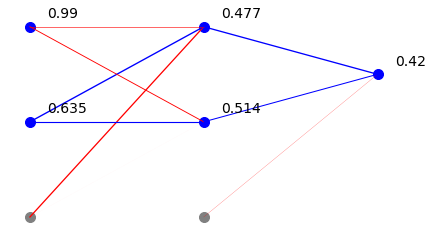

In [278]:
# ilustracja propagacji sygnału do przodu

po=[0,probka[0][0],probka[0][1]]     # pierwszy punkt z uprzednio używanej próbki
                                     # (punkty ograniczone dwiema liniami)
x=feed_forward_sig([3,3,2],wagi,po)
plot_net_w_x([3,3,2],wagi,x)

Zauważmy, że przy użyciu sigmoidu output jest liczbą rzeczywistą z przedziału (0,1).

A teraz kod, w którym krok po kroku wpisujemy wzory z naszego wyprowadzenia:

In [279]:
def back_teach_deb(p,eps): # p - nr punku danych, eps - szybkość uczenia
    po=[1,probka[p][0],probka[p][1]]
    print('punkt danych',po)
    
    x=feed_forward_sig([3,3,2],wagi,po) # propagacja do przodu z sigmoidem
    
    print('x: ',x)
    
    yt=probka[p][2]
    yu=x[2][1]
    print("odpowiedź poprawna = ", yt, "   uzyskana = ", round(yu,3))
    
    print('błąd: ',(yt-yu)*(yt-yu))
    
    s12=np.dot(x[1],wagi[2])[0]
    print("s_1^2 = ",round(s12,3))
    
    D12=2*(yu-yt)*dsig(s12)
    print("D_1^2 = ",round(D12,3))
    
    for A in [0,1,2]:
        wagi[2][A]-=eps*D12*x[1][A]
    print("w_A1^2 = ")
    print(np.matrix(np.round(wagi[2],3)))
    
    sA1=np.dot(x[0], wagi[1])
    print("s_A^1 = ",np.round(sA1,3))
    
    DA1=[D12*wagi[2][A+1][0]*dsig(sA1)[A] for A in [0,1]]
    print("D_A^1 = ",np.round(DA1,3))
    
    for B in [0,1,2]:
        for A in [0,1]:
            wagi[1][B][A]-=eps*DA1[A]*x[0][B]              
    print("w_BA^1 = ")
    print(np.matrix(np.round(wagi[1],3)))


In [280]:
# Jeden krok uczenia sieci propagacją wsteczną. Popatrz na strukturę macierzową.
back_teach_deb(10,.3)

punkt danych [1, 0.3868219036297741, 0.5668147439750906]
x:  {0: array([1.        , 0.3868219 , 0.56681474]), 1: array([1.        , 0.50678116, 0.59049289]), 2: array([1.        , 0.40883113])}
odpowiedź poprawna =  0.0    uzyskana =  0.409
błąd:  0.16714289322945539
s_1^2 =  -0.369
D_1^2 =  0.198
w_A1^2 = 
[[ 0.003]
 [-0.371]
 [-0.472]]
s_A^1 =  [0.027 0.366]
D_A^1 =  [-0.018 -0.023]
w_BA^1 = 
[[ 0.009  0.436]
 [-0.373 -0.452]
 [ 0.301  0.202]]


Powtarzając wykonanie powyższej kmórki widzimy, że wagi się delikatnie zmieniają.

In [281]:
# To samo, ale bez wypisywania kroków posrednich:
def back_teach(p,eps):
    po=[1,probka[p][0],probka[p][1]]
    x=feed_forward_sig([3,3,2],wagi,po)
    
    yt=probka[p][2]
    yu=x[2][1]

    s12=np.dot(x[1],wagi[2])[0]
    D12=2*(yu-yt)*dsig(s12)
#    D12=2*(yu-yt)*yu*(1-yu) # prawdziwe dla sigmoidu
    
    for A in [0,1,2]:
        wagi[2][A]-=eps*D12*x[1][A]
    
    sA1=np.dot(x[0], wagi[1])
    DA1=[D12*wagi[2][A+1][0]*dsig(sA1)[A] for A in range(2)]
#    DA1=[D12*wagi[2][A+1][0]*x[1][A]*(1-x[1][A]) for A in range(2)]

    for B in [0,1,2]:
        for A in [0,1]:
            wagi[1][B][A]-=eps*DA1[A]*x[0][B]  

### Uczenie sieci na próbce szkoleniowej

In [282]:
# początkowe losowe wagi
wagi={1:[[rn(),rn()],[rn(),rn()],[rn(),rn()]], 2:[[rn()],[rn()],[rn()]]}

In [283]:
# długość próbki szkoleniowej
len(probka)

3000

In [284]:
# uczenie - to chwilę potrwa!
eps=.7
for k in range(300):  # 300 rund
    eps=.99*eps
    for p in range(len(probka)):
        back_teach(p,eps) # efektywnośc zależy od szybkości uczenia

In [285]:
wagi

{1: [[-16.58082240711312, 16.426407143610106],
  [27.708839692255907, 16.69178633084975],
  [-0.31568622780379585, -33.943361088102854]],
 2: [array([7.18952955]), array([-14.97945601]), array([-20.36728513])]}

### Sprawdzenie na próbce testowej

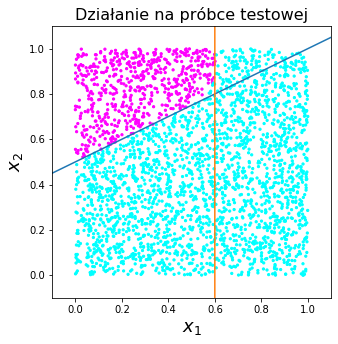

In [286]:
test=[] # próbka testowa

for k in range(3000):
    po=[1,random.random(),random.random()]  # nowy punkt testowy
    xt=feed_forward_sig([3,3,2],wagi,po)    # generowanie wyniku dla tego punktu
    test.append([po[1],po[2],np.round(xt[2][1],0)]) # zapis do tablicy

tt=np.array(test)   

plt.figure(figsize=(5,5))
plt.title("Działanie na próbce testowej",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

lin=l2(0.5,0.5,-1)
plt.plot(lin[0],lin[1])

lin2=l2(0.6,-1,0.00001)
plt.plot(lin2[0],lin2[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

**Douczajmy naszą sieć, jeśli wynik jest niezadowalający** (trzeba kilkuset rund na próbce szkoleniowej o liczebności 3000)

In [287]:
# Jak wcześniej, tylko dodane skalowanie grubości linii

def plot_net_w_s(n_war, wagi,s):
    """Narysuj sieć z wagami"""
    li_war=len(n_war)
    plt.figure(figsize=(7,4)) # rozmiar rysunku

    for i in range(li_war): # pętla po warstwach
        for j in range(1,n_war[i]): # pętla po węzłach innych niż progowe w warstwie (zaczynamy od 1)
            plt.scatter(i, j-n_war[i]/2, s=100,c='blue') 
            # rysuj punkt o współrzędnej poziomej i oraz współrzędnej pionowej rosnącej z j 
            # odjęcie n_war[i]/2 powoduje, że średnie pionowe połozenie punktów jest 0
        
    for i in range(li_war-1): # pętla po warstwach z wyjatkiem outputowej
            plt.scatter(i, 0-n_war[i]/2, s=100,c='gray') # dodaj węzły progowe innym kolorem
    
    li_par=0 #liczba wag
    
    for i in range(li_war-1):
        for j in range(n_war[i]):
            for k in range(n_war[i+1]-1):
                li_par+=1
                th=3*wagi[i+1][j][k]*s
                if th>0:
                    col='red'
                else:
                    col='blue'
                th=abs(th)
                plt.plot([i,i+1],[j-n_war[i]/2,k+1-n_war[i+1]/2],c=col,linewidth=th)
                

    plt.title("Wytrenowana sieć",fontsize=16)

    plt.axis("off")
    plt.show()

Wagi uzyskane w procesie uczenia są za każdym razem inne! Są więc lokalne minima dla każdego z nich sieć działą podobnie.

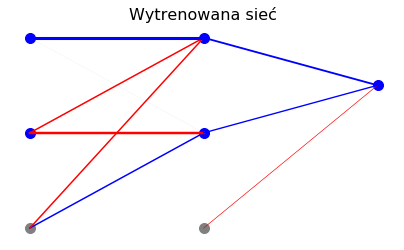

In [288]:
plot_net_w_s([3,3,2],wagi,0.03)

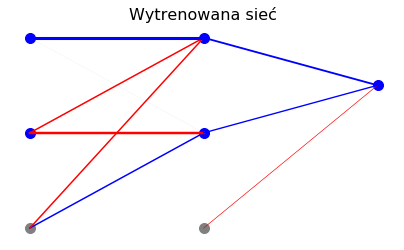

In [289]:
plot_net_w_s([3,3,2],wagi,0.03)

Poniżej inny wytrenowany przypadek - NIE PRZELICZAĆ

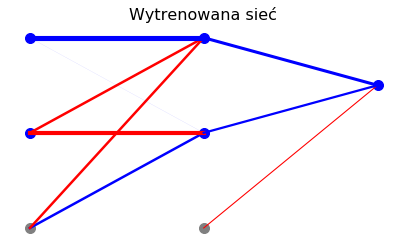

In [290]:
plot_net_w_s([3,3,2],wagi,0.05)

## Komentarz

Jest kilka istotnych spostrzeżeń:

- uczenie trwa długo, a użycie mgnienie oka,

- sieć sie myli dla punktów koło linii ograniczających, można ją douczać celem polepszenia,

- zbyt długie douczanie nie ma sensu, bo dokładność przestaje się polepszać,

- wartości wag, w tym przykładzie, rosną w miarę uczenia, tj. prawdopodobnie próbują "uciekać do nieskończoności".

Co więcej, nasze rozwiązanie, dające z grubsza tej samej jakości sieć, jest za każdym razem (dla danego zestawu początkowych losowych wag) **inne!** Jest zatem wiele minimów tej 9-wymiarowej funkcji (tyle jest wag), prowadzących do b. podobnego działania sieci. Lokalne minima nie są więc bynajmniej przeszkodą w stosowaniu tego algorytmu. Jest to ważna praktyczna cecha.

Są bardziej wyszukane metody znajdowania minimum funkcji, oparte o przedstawioną tutaj metodę najstromszego spadku, czy też zgoła inne. Pozwalają one na bardziej efektywne osiąganie (lokalnego) minimum. Nie bedziemy w tym wykładzie wchodzi w te dość techniczne szczegóły.


# ZADANIE

Rozważ perceptron z jedną warstwą pośrednią klasyfikująca punkty w trójkącie, kwadracie, ogólnie w jakimś *wypukłym* wielokącie na płaszczyżnie.

- Ile neuronów potrzeba w warstwie pośredniej?

- Skonstruuj "analityczną" sieć dla trójkąta lub kwadratu, dobierając odpowiednio wagi. Trójkąt można określić np. jako koniunkcję trzech warunków: $x_1+x_2<1.2$, $x_1>0.2$, $x_2>0.2$ (parametry mogą być oczywiście inne).

- Utwórz próbkę testową i narysuj ją jako scattered plot, zaznaczając punkty w trójkącie i na zewnątrz różnymi kolorami.

- Zmodyfikuj kod dla propagacji wstecznej z sigmoidem (zwróć należytą uwagę na kwestię zakresu wskaźników, zależącego od liczby neuronów).

- Naucz sieć na próbce szkoleniowej.

- Sprawdź działanie na próbce testowej. Zrób grafikę dla próbki testowej. Narysuj linie określające wielokąt.

- Skomentuj wyniki. 

# Wykład 6

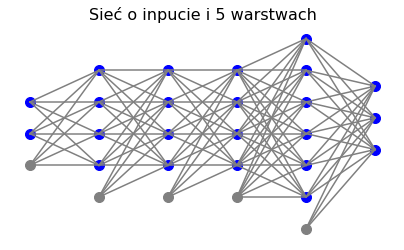

In [291]:
plot_net([3,5,5,5,7,4])

Przejdziemy teraz do sformułowania algorytmu propagacji wstecznej dla perceptronu o dowolnej liczbie $k$ warstw pośrednich, oraz o dowolnej liczbie neuronów $n$ w warstwie outputowej. Uogólnienie to jest koncepcyjnie bardzo proste i opiera się o analogiczne rozumowanie, jak w poprzednim wykładzie dla perceptronu o jednej warswie pośredniej i jednym neuronie w warstwie outputowej. Natomiast notacja się dość znacznie komplikuje, co może powodować, że materiał wyda się trudny.

Funkcja błędu dla jednego punktu z próbki szkoleniowej jest teraz sumą po wszystkich neuronach w warstwie outputowej, numerowanych wskaźnikiem $\gamma=1,2,\dots,n$:

$b(\{w\})= \sum_{\gamma=1}^n(y_{u,\gamma}-y_{t,\gamma})^2$,

gdzie

$y_{u,\gamma}=\sigma(\sum_{\alpha=0} x_\alpha^{(k)} w_{\alpha \gamma}^{(k+1)}), ~~~~~ \gamma=1,2,\dots,n$.

Dla neuronu $\alpha$ w warstwie $j=1,2,\dots,k$ sygnał wchodzący to

$s_\alpha^{(j)}=\sum_{\beta=0} x_\beta^{(j-1)}w_{\beta \alpha}^{(j)},  ~~~~ \alpha=1,2,\dots$,

a sygnał wychodzący wynosi

$x_\alpha^{(j)}=\sigma \left ( s_\alpha^{(j)}\right ), ~~~~~ \alpha=1,2,\dots$,

$x_0^{(j)}=1$.

Kolejne podstawienia w funkcji $b$ są następujące:

$b= \sum_{\gamma} (y_{u,\gamma}-y_{t,\gamma})^2 \\ =
\sum_{\gamma} \left( \sigma \left (\sum_{\alpha_k=0} x_{\alpha_k}^{(k)} w_{\alpha_k \gamma}^{(k+1)} \right )-y_{t,\gamma} \right)^2 \\=
\sum_{\gamma} \left( 
\sigma \left (\sum_{\alpha_k=1} \sigma\left( \sum_{\alpha_{k-1}=0} x_{\alpha_{k-1}}^{(k-1)} w_{\alpha_{k-1} \alpha_k}^{(k)}\right) w_{\alpha_k \gamma}^{(2)} + x_0^{(k)} w_{0 \gamma}^{(k+1)} \right)-y_{t,\gamma} \right)^2\\=
\sum_{\gamma} \left( 
\sigma \left (\sum_{\alpha_k=1}  \sigma\left( 
\sum_{\alpha_{k-1}=1} \sigma\left( \sum_{\alpha_{k-2}=0} x_{\alpha_{k-2}}^{(k-2)} w_{\alpha_{k-2} \alpha_{k-1}}^{(k-1)}\right) w_{\alpha_{k-1} \alpha_k}^{(k)} + 
x_{0}^{(k-1)} w_{0 \alpha_k}^{(k)}
 \right)  w_{\alpha_k \gamma}^{(2)} + x_0^{(k)} w_{0 \gamma}^{(k+1)} \right)-y_{t,\gamma} \right)^2 \\= \dots
$

Wskaźniki numerujące neurony w warstwie $j$ oznaczone sa jako $\alpha_j$. Obliczając kolejne pochodne po wagach idąc wstecz, tj. od końca do początku sieci (tu się trzeba trochę namęczyć, by zauważyć powtarzającą się prawidłowość), i stosując metodę najstromszego spadku, dostajemy następujący przepis:


$  w_{B A}^{(j)} \to   w_{B A}^{(j)} -\varepsilon D_{A}^{(j)} x_{B}^{(j-1)},
~~~ j=1,\dots,k+1,$ 

gdzie, rekurencyjnie, 

$ D_{\gamma}^{(k+1)}=2 (y_{u,\gamma}-y_{t,\gamma})\, \sigma'(s_\gamma^{(k+1)}), \\
D_A^{(k)}= \sum_C D_C^{(k+1)}\, w_{AC}^{(k+1)} \,\sigma'(s_A^{(k)}), \\
D_A^{(k-1)}= \sum_C D_C^{(k)}\, w_{AC}^{(k)} \,\sigma'(s_A^{(k-1)}), \\
\dots \\
D_A^{(1)}= \sum_C D_C^{(2)}\, w_{AC}^{(2)} \,\sigma'(s_A^{(1)}),$

co możemy zapisać w bardziej zwarty spsób jako

$ D_{\gamma}^{(k+1)}=2 (y_{u,\gamma}-y_{t,\gamma})\, \sigma'(s_\gamma^{(k+1)}), \\
D_A^{(j)}= \sum_C D_C^{(j+1)}\, w_{AC}^{(j+1)} \,\sigma'(s_A^{(j)}), ~~~~ j=k,k-1,\dots,1.$

Dla sigmoidu możemy ponadto użyć własności

$\sigma'(s_A^{(i)})=x_A^{(i)}(1-x_A^{(i)})$.

Powyższe wzory ukazują z całą wyrazistością **propagację wsteczną** dla uaktualniania wag, albowiem zaczynamy od ostatniej warstwy i kolejno cofamy się do początku sieci. W każdym kroku doliczamy tylko wielkości charakteryzujące daną warstwę.


# Podsumowanie dla tych, co nie lubią wyprowadzeń

Mamy metodę, która działą w następujący sposób:

1. Generujemy próbkę szkoleniową (dane i cecha klasyfikująca).

2. Ustalamy początkowe wagi sieci, np. losowo.

3. Trenujemy sieć na próbce szkoleniowej, iteracyjnie ulepszając wagi. Korzystamy z algorytmu propagacji wstecznej.

4. Testujemy wytrenowaną sieć na próbce testowej.

5. Jeśli działanie jest niesatysfakcjonujące, powtarzamy od punktu 3. Ew. modyfikujemy parametry "techniczne", jak szybkość uczenia.

# Kod dla algorytmu propagacji wstecznej dla sieci o dowolnej liczbie wastw

Teraz utworzymy kod realizujący nasz algorytm dla sieci o dowolnej liczbie warst i dowolnej liczbie neuronów w warstwie outputowej. Poprzedni był dla przypadku jednej warstwy pośredniej. Jest to programistyczne zaimplementowanie wyprowadzonych powyżej wzorów. W kodzie staramy się zachować w miarę możliwości notację z wyprowadzenia.

Na początek dla przypomnienia nasza przykładowa sieć, która posłuży testom:

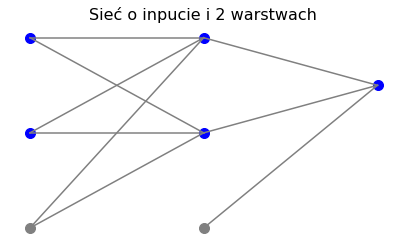

In [292]:
plot_net([3,3,2])

In [293]:
n_war=np.array([3,3,2]) # liczby węzłów w kolejnych warstwach (licząc też "węzły progowe" o inpucie 1)

li_war=len(n_war) # liczba warstw (licząc warstwę inputową)

wagi={}

# inicjalizujemy wszystkie wagi losowo
for i in range(li_war-1): 
    wagi.update({i+1 : np.random.rand(n_war[i],n_war[i+1]-1)}) # wagi miedzy warstwą i a i+1
                                            # -1 bo nie ma połączenia do węzła progowego

In [294]:
wagi

{1: array([[0.55270744, 0.5712368 ],
        [0.34198437, 0.17114404],
        [0.91699826, 0.77582519]]),
 2: array([[0.86330234],
        [0.03027676],
        [0.04360793]])}

... oraz poprzednio wygenerowana próbka szkoleniowa (punkty na płaszczyźnie ograniczone dwiema prostymi)

In [295]:
probka

array([[0.63464502, 0.98981889, 0.        ],
       [0.15133372, 0.59369919, 1.        ],
       [0.87951947, 0.46544331, 0.        ],
       ...,
       [0.29200423, 0.62705581, 0.        ],
       [0.56996977, 0.89434799, 1.        ],
       [0.24299488, 0.16146461, 0.        ]])

Dla przyszłej ogólności (nowa konwencja), rozdzielamy próbkę na tablicę danych "da" i poprawnych odpowiedzi "od":

In [296]:
da=np.delete(probka,2,1)
da

array([[0.63464502, 0.98981889],
       [0.15133372, 0.59369919],
       [0.87951947, 0.46544331],
       ...,
       [0.29200423, 0.62705581],
       [0.56996977, 0.89434799],
       [0.24299488, 0.16146461]])

In [297]:
od=np.delete(np.delete(probka,0,1),0,1)
od

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

A teraz kod (ma 14 linii, nie licząc komentarzy!)

In [298]:
def back_prop(dane, odp, p, n_war, wagi, eps):
    """Propagacja wsteczna"""

# dane - dane szkoleniowe:    
# tablica o liczbie kolumn = liczba węzłów w warstwie inputowej  -1 (nie liczymy węzłą progowego)
#                i liczie wierszy = liczbie punktów danych

# odp - poprawne odpowiedzi
# tablica o liczbie kolumn = liczba węzłów w warstwie outputowej -1 (nie liczymy węzłą progowego)
#                i liczbie wierszy = liczbie punktów danych

# p=0,1, ..., liczba danych-1 - numer punktu w próbce danych szkoleniowych

# n_war - tablica liczby węzłów w kolejnych warstwach od inputu poprzez pośrednie do outputu

    li_war=len(n_war) # liczba warstw (licząc wszystkie)

    po=np.insert(dane[p],0,1) # dodanie do punktu danych jedynki na początku (węzeł progowy)

    x=feed_forward_sig(n_war,wagi,po) # propagacja sygnału do przodu z sigmoidem
   
    n=n_war[li_war-1]-1  # liczba neuronów w warstwie outputowej 
    
    k=len(n_war)-2       # liczba warstw pośrednich
                         # wszystkich warstw jest k+2, są numerowane jako 0,1,2,...,k+1
                         # tj. 0 - inputowa, k+1 - outputowa, pozostałe pośrednie

    D={}                 # słownik dla wielkości D z wyprowadzenia
    
    D.update({k+1:       # D[k+1] - dla warstwy outputowej
        [2*(x[k+1][gam]-odp[p][gam-1])*dsig(np.dot(x[k],wagi[k+1]))[gam-1] for gam in range(1,n+1)]})   

    wagi[k+1]-=eps*np.outer(x[k],D[k+1]) # uaktualnienie wag prowadzących do warstwy outputowej
    
    # pętla po pozostałych warstwach po j = k, k-1, ..., 1
    for j in reversed(range(1,k+1)):            # pętla w odwrotnej kolejności
        u=np.delete(np.dot(wagi[j+1],D[j+1]),0) # implementacja wzoru z wyprowadzena
        v=dsig(np.dot(x[j-1],wagi[j]))          # ...
        D.update({j: [u[i]*v[i] for i in range(len(u))]}) # dopisanie D[j] do słownika
        wagi[j]-=eps*np.outer(x[j-1],D[j])      # uaktualnienie wag

### Test nowego kodu:

In [299]:
# inicjalizujemy wszystkie wagi jako 0
for i in range(li_war-1): 
    wagi.update({i+1 : np.zeros([n_war[i],n_war[i+1]-1])}) # wagi miedzy warstwą i a i+1

print(wagi)    

back_prop(da,od,11,n_war,wagi,0.1) # jednokrotne puszczenie na 11 punkcie danych
wagi

{1: array([[0., 0.],
       [0., 0.],
       [0., 0.]]), 2: array([[0.],
       [0.],
       [0.]])}


{1: array([[7.81250000e-05, 7.81250000e-05],
        [5.87845733e-05, 5.87845733e-05],
        [6.51504086e-05, 6.51504086e-05]]),
 2: array([[-0.025 ],
        [-0.0125],
        [-0.0125]])}

Sprawdzamy wynik, porównując z naszym poprzenim kodem dla jednej warswy pośredniej:

In [300]:
# inicjalizujemy wszystkie wagi jako 0
for i in range(li_war-1): 
    wagi.update({i+1 : np.zeros([n_war[i],n_war[i+1]-1])}) # wagi miedzy warstwą i a i+1

back_teach(11,.1)
wagi

{1: array([[7.81250000e-05, 7.81250000e-05],
        [5.87845733e-05, 5.87845733e-05],
        [6.51504086e-05, 6.51504086e-05]]),
 2: array([[-0.025 ],
        [-0.0125],
        [-0.0125]])}

Powinno się zgodzić 1 do 1, i tak jest!

### Inicjalizowanie losowe wag

In [301]:
# losowe wagi z przedziału (-0.5,0.5)
def ran_w(n_war):
    li_war=len(n_war) 
    wa={}
    for k in range(len(n_war)-1):
        wa.update({k+1: [[rn() for i in range(n_war[k+1]-1)] for j in range(n_war[k])]})
    return wa

In [302]:
# losowe wagi z przedziału (-0.5s,0.5s)
def ran_w_s(n_war,s):
    li_war=len(n_war) 
    wa={}
    for k in range(len(n_war)-1):
        wa.update({k+1: [[s*rn() for i in range(n_war[k+1]-1)] for j in range(n_war[k])]})
    return wa

In [303]:
ran_w_s([3,3,2],10)

{1: [[-4.131408982205292, -2.61792360226769],
  [-0.6741858177354565, 4.430664895782169],
  [-0.03938355816247352, 1.6583808767187658]],
 2: [[2.9669209635708804], [-4.562310185588209], [-3.4539200749483556]]}

### Uczenie sieci nowym kodem na próbce szkoleniowej

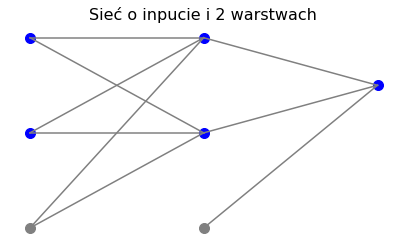

In [304]:
siec=[3,3,2]
plot_net(siec)

wagi=ran_w(siec); # początkowe losowe wagi

In [305]:
eps=.7
for k in range(300):  # 300 rund
    eps=.99*eps
    print(k,' ',end="")
    for p in range(len(probka)): # pętla po punktach próbki
        back_prop(da,od,p,siec,wagi,eps)

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192  193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208  209  210  211  212  213  214  215  216  217  218  219  220  221  

In [308]:
eps # końcowa wartość

0.03432862584989998

#### Sprawdzenie na próbce testowej

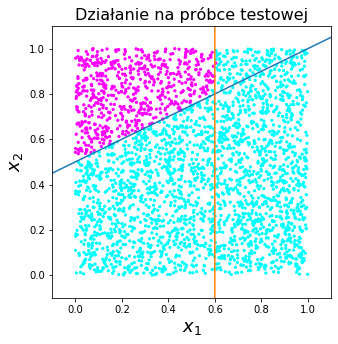

In [307]:
test=[] # próbka testowa

for k in range(3000):
    po=[1,random.random(),random.random()]  # nowy punkt testowy
    xt=feed_forward_sig(siec,wagi,po)    # generowanie wyniku dla tego punktu
    test.append([po[1],po[2],np.round(xt[2][1],0)]) # zapis do tablicy

tt=np.array(test)   

plt.figure(figsize=(5,5))
plt.title("Działanie na próbce testowej",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

lin=l2(0.5,0.5,-1)
plt.plot(lin[0],lin[1])

lin2=l2(0.6,-1,0.00001)
plt.plot(lin2[0],lin2[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

### Próba uczenia sieci z pojedynczym neuronem (wiemy, że się nie uda!)

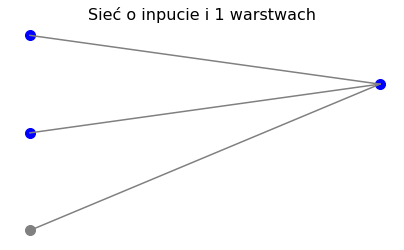

In [309]:
siec=[3,2]
plot_net(siec)

wagi=ran_w(siec); # początkowe losowe wagi

In [310]:
for k in range(100):  # 100 rund
    for p in range(len(probka)):
        back_prop(da,od,p,siec,wagi,0.7)

#### Sprawdzenie na próbce testowej

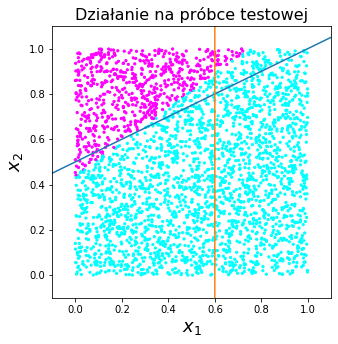

In [311]:
test=[] # próbka testowa

for k in range(3000):
    po=[1,random.random(),random.random()]  # nowy punkt testowy
    xt=feed_forward_sig(siec,wagi,po)    # generowanie wyniku dla tego punktu
    test.append([po[1],po[2],np.round(xt[1][1],0)]) # zapis do tablicy

tt=np.array(test)   

plt.figure(figsize=(5,5))
plt.title("Działanie na próbce testowej",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

lin=l2(0.5,0.5,-1)
plt.plot(lin[0],lin[1])

lin2=l2(0.6,-1,0.00001)
plt.plot(lin2[0],lin2[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

### Uczenie na sieci z większą liczbą neuronów (czemu nie?)

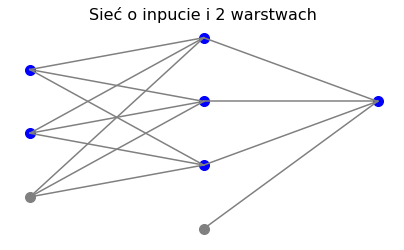

In [312]:
siec=[3,4,2]
plot_net(siec)

wagi=ran_w(siec); # początkowe losowe wagi

In [313]:
eps=.7
for k in range(300):  # 300 rund
    eps=.99*eps
    print(k,' ',end='')
    for p in range(len(probka)):
        back_prop(da,od,p,siec,wagi,eps)

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192  193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208  209  210  211  212  213  214  215  216  217  218  219  220  221  

#### Sprawdzenie na próbce testowej

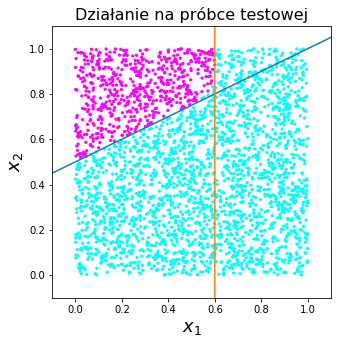

In [314]:
test=[] # próbka testowa

for k in range(3000):
    po=[1,random.random(),random.random()]  # nowy punkt testowy
    xt=feed_forward_sig(siec,wagi,po)    # generowanie wyniku dla tego punktu
    test.append([po[1],po[2],np.round(xt[2][1],0)]) # zapis do tablicy

tt=np.array(test)   

plt.figure(figsize=(5,5))
plt.title("Działanie na próbce testowej",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

lin=l2(0.5,0.5,-1)
plt.plot(lin[0],lin[1])

lin2=l2(0.6,-1,0.00001)
plt.plot(lin2[0],lin2[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

### Uczenie na głębszej sieci

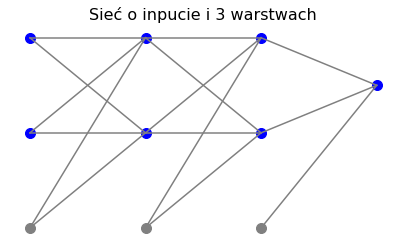

In [315]:
siec=[3,3,3,2]
plot_net(siec)

wagi=ran_w(siec); # początkowe losowe wagi

In [316]:
eps=.7
for k in range(300):  # 300 rund
    eps=.99*eps
    print(k,' ',end='')
    for p in range(len(probka)):
        back_prop(da,od,p,siec,wagi,eps)

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192  193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208  209  210  211  212  213  214  215  216  217  218  219  220  221  

#### Sprawdzenie na próbce testowej

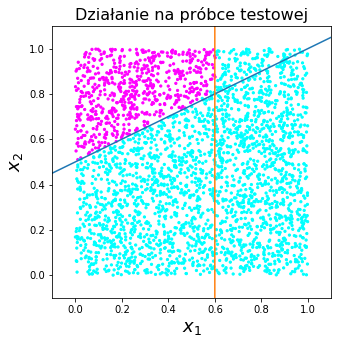

In [318]:
test=[] # próbka testowa

for k in range(3000):
    po=[1,random.random(),random.random()]  # nowy punkt testowy
    xt=feed_forward_sig(siec,wagi,po)    # generowanie wyniku dla tego punktu
    test.append([po[1],po[2],np.round(xt[3][1],0)]) # zapis do tablicy

tt=np.array(test)   

plt.figure(figsize=(5,5))
plt.title("Działanie na próbce testowej",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

lin=l2(0.5,0.5,-1)
plt.plot(lin[0],lin[1])

lin2=l2(0.6,-1,0.00001)
plt.plot(lin2[0],lin2[1])

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

# Przykład z punktami w kole


In [319]:
# zwraca losowe współrzędne x1, x2 oraz 1 dla punktów 
# w kole o środku (0.5,0.5) i promeniu 0.4, a 0 poza nim

def kolo():
    x1=random.random()
    x2=random.random()
    if((x1-0.5)*(x1-0.5)+(x2-0.5)*(x2-0.5) < 0.4*0.4): # w kole
        return np.array([x1,x2,1])
    else:                                              # poza kołem
        return np.array([x1,x2,0])


In [320]:
# nasz punkt i liczba "kontrolna" czy "klasyfikująca":, wskazująca czy jest w okręgu czy poza
kolo()

# format:  x1          x2       l. kontrolna 

array([0.91883945, 0.53209129, 0.        ])

In [321]:
# losowa próbka szkoleniowa 3000 punktów 
probka_k=np.array([kolo() for i in range(3000)])
da_k=np.delete(probka_k,2,1)
od_k=np.delete(np.delete(probka_k,0,1),0,1)

In [322]:
od_k

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

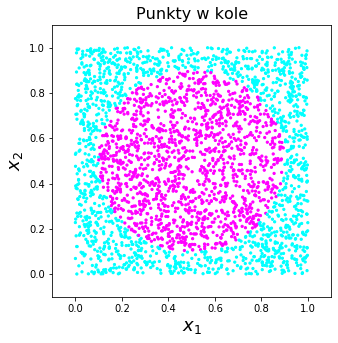

In [323]:
plt.figure(figsize=(5,5))
plt.title("Punkty w kole",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(probka_k[:,0],probka_k[:,1],c=probka_k[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

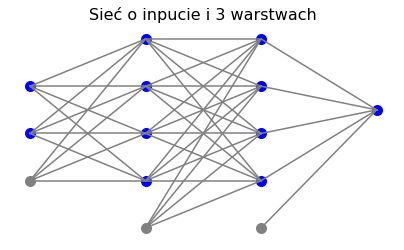

In [324]:
# sieć o dość pokaźnej liczbie neuronów
siec=[3,5,5,2]
plot_net(siec)

wagi=ran_w_s(siec,5.); # początkowe losowe wagi

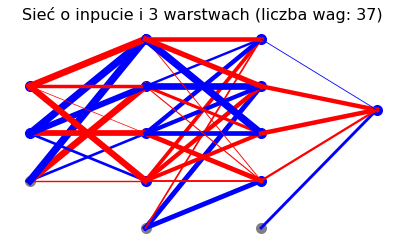

In [325]:
plot_net_w(siec,wagi)

In [327]:
# uczenie trwa dość długo, trzeba tę komórkę przepuścić kilka (3-10) razy

eps=.7
for k in range(200):  # 200 rund
    eps=.99*eps
    if k%10==9:
        print(k+1,' ',end='')
    for p in range(len(probka)):
        back_prop(da_k,od_k,p,siec,wagi,eps)

10  20  30  40  50  60  70  80  90  100  110  120  130  140  150  160  170  180  190  200  

#### Sprawdzenie na próbce testowej

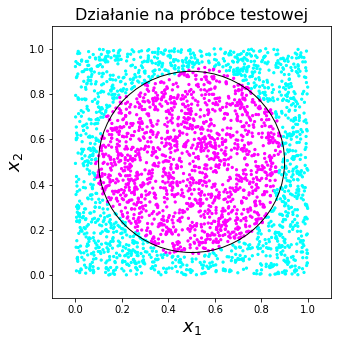

In [329]:
test=[] # próbka testowa

for k in range(3000):
    po=[1,random.random(),random.random()]  # nowy punkt testowy
    xt=feed_forward_sig(siec,wagi,po)    # generowanie wyniku dla tego punktu
    test.append([po[1],po[2],np.round(xt[3][1],0)]) # zapis do tablicy

tt=np.array(test) # zmiana formatu tablicy na numpy  

fig=plt.figure(figsize=(5,5))

# dorysowanie okręgu
ax=fig.add_subplot(1,1,1)
circ=plt.Circle((0.5,0.5), radius=.4, color='black', fill=False)
ax.add_patch(circ)

plt.title("Działanie na próbce testowej",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

Komentarz: Fascynujące jest, że nauczyliśmy sieć rozpoznawać, czy punkt jest w kole, a nie ma ona pojecia o geometrii, odległości euklidesowej, równaniu okregu itd. Po prostu sieć nauczyła się tego "empirycznie".

### Odporność sieci na zniszczenia słabych połączeń

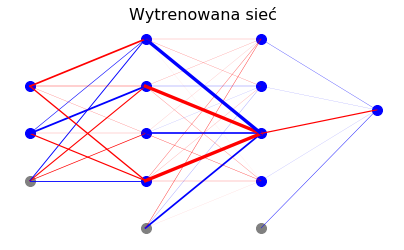

In [330]:
plot_net_w_s(siec,wagi,.03)

Nasza sieć ma wiele połączeń synaptycznych. Zobaczmy, co się stanie, jak usuniemy jedno z nich, np. połączenie między neuronem 0 w warstwie 1 i neuronem 3 w warstwie 2. Jest to dodatnia, małej wielkości waga równa

In [331]:
wagi[1][0][2]  # trzeci neuron jest numerowany jako 2, tj. liczymu tylko po niebieskich 
               # punktach od zera

12.065428499439257

Zmieńmy ją na 0. Na rysunku widzimy, że połączenie zniknęło.

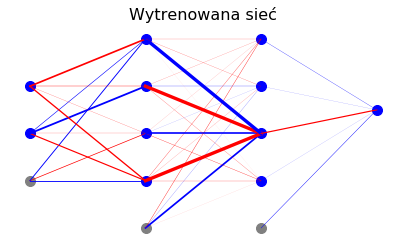

In [332]:
wagi[1][0][2]=0
plot_net_w_s(siec,wagi,.03)

Poniżej widzimy, że usunięcie tego połączenia ma wpływ na działanie sieci:

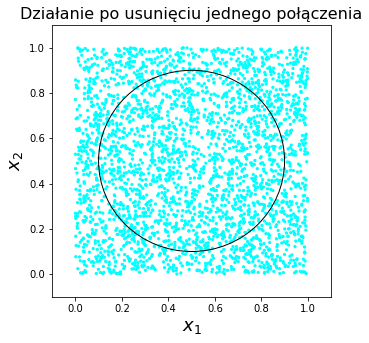

In [333]:
test=[] # próbka testowa

for k in range(3000):
    po=[1,random.random(),random.random()]  # nowy punkt testowy
    xt=feed_forward_sig(siec,wagi,po)    # generowanie wyniku dla tego punktu
    test.append([po[1],po[2],round(xt[3][1],0)]) # zapis do tablicy

tt=np.array(test) # zmiana formatu tablicy na numpy  

fig=plt.figure(figsize=(5,5))

# dorysowanie koła
ax=fig.add_subplot(1,1,1)
circ=plt.Circle((0.5,0.5), radius=.4, color='black', fill=False)
ax.add_patch(circ)

plt.title("Działanie po usunięciu jednego połączenia",fontsize=16) 
plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
plt.scatter(tt[:,0],tt[:,1],c=tt[:,2],
            s=5,cmap=mpl.cm.cool,norm=mpl.colors.Normalize(vmin=0, vmax=.9))

plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$x_2$',fontsize=18);

Jeśli sieć ma bardzo wiele neuronów i połączeń, poszczególnymi synapsami płynie niewiele sygnału i dzieki temu sieć jest odporna na niewielkie losowe uszkodzenia. Tak dzieje się w mózgu, który podlega ustawicznym "zniszczeniom" (promieniowanie kosmiczne, alkohol, ...). Poza tym, taka sieć po zniszczeniu może być (już z mniejszą ilością połączeń) na nowo wytrenowana.

# Zadanie:

Zmodyfikuj przykład z kołem z wykładu, zastępując obszar (do wyboru)

- półkolem
- dwoma kołami
- pierścieniem
- jakąś Twoją ulubiona figurą

Poeksperymentuj z liczbą warstw i neuronów, pamietając jednak, że ich duża liczba zwiększa czas obliczeń a niekoniecznie polepsza wynik.

# Przybliżona reprezentacja funkcji ciągłych z pomocą sieci neuronowych 
# (regresja)

Dotychczas zajmowaliśmy się klasyfikatorami, tj. sieciami rozpoznającymu czy dany obiekt (u nas punkt na płaszczyźnie) posiada pewne cechy. W tym wykładzie pokażemy inne zastosowanie, bardzo przydatne w analizie pomiarów.

Wyobraźmy sobie, że mamy pewne dane doświadczalne. Tutaj symulujemy je w sztuczny sposób, np.

In [334]:
def fi(x):
    return 0.2+0.8*np.sin(x) # sinus + stała

In [335]:
np.pi

3.141592653589793

In [336]:
# przykład 1
upx=np.pi                                 # zakres współrzędnej = [0,pi]
def dane():
    x = upx*random.random()               # współrzędna x z (0,pi)
    y = fi(x)+0.2*(random.random()-0.5)   # wartość funkcji, y=fi(x)+szum
    return [x,y]

In [337]:
dane() # losowa współrzędna x i zaszumione y

[0.2591827778699884, 0.3572949799429558]

Tablicujemy nasze (zaszumione) dane i robimy wykres wraz z funkcją fi(x), wokół której sie układają. Jest to imitacja pomiaru doświadczalnego, który zawsze obarczony jest pewnym błędem.

In [338]:
tab=np.array([dane() for i in range(50)]) # 50 punktów

da_f=np.delete(tab,1,1)                   # dane inputowe, czyli x
od_f=np.delete(tab,0,1)                   # prawdziwy output, czyli y

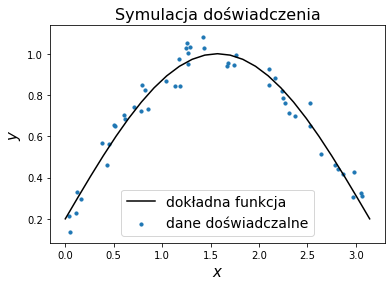

In [339]:
plt.figure(figsize=(6,4))

coo=np.linspace(0,upx,25)

exact=[fi(x) for x in coo]

plt.plot(coo,exact,c='black',label='dokładna funkcja')

plt.title("Symulacja doświadczenia",fontsize=16) 
plt.scatter(da_f,od_f,s=10,label='dane doświadczalne')

plt.legend(prop={'size':14})

plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',fontsize=15);

W naszym obecnym języku sieci neuronowych mamy zatem próbke szkoleniową skladającą się z punktów o inpucie $x$ i outpucie $y_t=$fi$(x)$. Jak uprzednio, będziemy minimalizować w odpowiedniej sieci neuronowej (patrz poniżej) funkcję błędu po wagach $\{w\}$,

$B(\{w\})=\sum_p (y_u - y_t)^2$. 

Ponieważ $y_u$ jest pewną (zależną od wag) funkcją $x$ (wartość $y_u$ da nam sieć neuronowa), metoda ta jest wariantem tzw. metody najmniejszych kwadratów, stosowanej powszechnie w analizie danych. Różnica polega na tym, że w standardowej metodzie najmniejszych kwadratów modelowa funkcja którą dopasowujemy do danych ma jakąś prostą analityczną postać, np. $f(x)=A+Bx$), podczas gdy teraz jest ona pewną "zakamuflowaną" funkcją zależną od struktury sieci neuronowej, doboru funkcji aktywacji oraz wag jako parametrów.

Aby zrozumieć podstawową ideę, rozważmy sieć o dwóch neuronach w warstwie pośredniej:

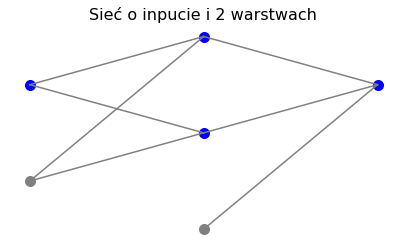

In [340]:
plot_net([2,3,2])

Zgodnie z naszą notacją, sygnał docierający do neuronów w warstwie pośredniej to 

$s_1^{(1)}=w_{01}^{(1)}+w_{11}^{(1)} x$,

$s_2^{(1)}=w_{02}^{(1)}+w_{12}^{(1)} x$,

sygnał z nich wychodzący to, odpowiednio,

$\sigma \left( w_{01}^{(1)}+w_{11}^{(1)} x \right)$,

$\sigma \left( w_{02}^{(1)}+w_{12}^{(1)} x \right)$,

zatem sygnał wchodzący do neuronu w outpucie to 

$s_1^{(1)}=w_{01}^{(2)}+ w_{11}^{(2)}\sigma \left( w_{01}^{(1)}+w_{11}^{(1)} x \right)
+  w_{21}^{(2)}\sigma \left( w_{02}^{(1)}+w_{12}^{(1)} x \right)$. 

Biorąc celem ilustracji przykładowe wartości stałych 

$w_{01}^{(2)}=0, \, w_{11}^{(2)}=1, \, w_{21}^{(2)}=-1, \,
w_{11}^{(1)}=w_{12}^{(1)}=1, \, w_{01}^{(1)}=...,$

dostajemy 

$s_1^{(1)}=\sigma(x-x_1)-\sigma(x-x_2)$.

Funkcja ta w $- \infty$ dąży do 0, następnie rośnie z $x$, osiąga maksimum 
w $(x_1+x_2)/2$, po czym maleje, dążąc do 0 w $+\infty$. Przetawia to poniższy rusynek, sporządzony dla $x_1=0$ i $x_2=4$. 

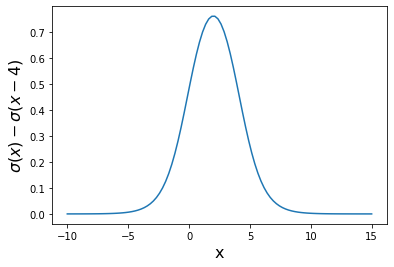

In [341]:
s = np.linspace(-10, 15, 100)

fs = [sig(z-0)-sig(z-4) for z in s]

plt.xlabel('x',fontsize=16)
plt.ylabel('$\sigma(x)-\sigma(x-4)$',fontsize=16)

plt.plot(s, fs);

Tak więc jesteśmy w stanie utworzyć z parą neuronów w warstwie pośredniej sygnał ("garb"), który jest zlokalizowany wokół zadanej wartości, tutaj $(x_1+x_2)/2 =2$. Zmieniając inne parametry (wagi) jesteśmy w stanie modyfikować jego kształt, szerokość i wysokość. 

Mając do dyspozycji kilka takich par sigmoidów (czy garbów) możemy starać się "wypełnić" nimi funkcję, którą chcemy przybliżyć. Zaimprowizowany przykład, że jest to możliwe, pokazany jest poniżej:

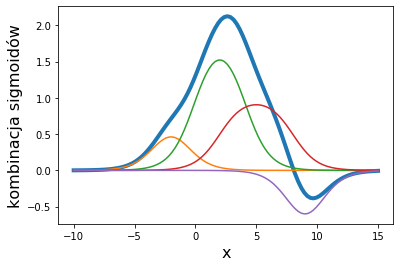

In [342]:
s = np.linspace(-10, 15, 100)

f1 = [sig(z+3)-sig(z+1) for z in s]
f2 = [2*(sig(z-0)-sig(z-4)) for z in s]
f3 = [sig(z-2)-sig(z-8) for z in s]
f4 = [-1.3*(sig(z-8)-sig(z-10)) for z in s]

fs = [sig(z+3)-sig(z+1)+2*(sig(z-0)-sig(z-4))+sig(z-2)-sig(z-8)-1.3*(sig(z-8)-sig(z-10)) 
       for z in s]

plt.xlabel('x',fontsize=16)
plt.ylabel('kombinacja sigmoidów',fontsize=16)

plt.plot(s, fs, linewidth=4)
plt.plot(s, f1)
plt.plot(s, f2)
plt.plot(s, f3)
plt.plot(s, f4);


Na powyższym rysunku funkcje składowe (cienkie linie przedstawiające pojedyncze garby) sumują się do pewnej funkcji o dość skomplikowanym kształcie, oznaczonej grubą linią. Zauważmy, że po prostu sumujemy sygnały bez "obkładania" ich sigmoidem w warstwie outputowej, co niepotrzebnie spowodowałoby, że wartość funkcji byłaby miedzy 0 a 1. 

Mamy sięc następującą modyfikację sieci neuronowej przeznaczonej do interpolacji funkcji: 
**w warstwie outputowej odpowiedź jest liniowa**, tj. nie mamy tam sigmoidu (inaczej, funkcja aktywacji w tej warstwie jest funkcją identycznościową). Oczywiście w warstwach pośrednich sigmoidy zostają.

Możemy teraz "zatrudnić" propagację wsteczną, aby dopasować nasze dane doświadczalne do funkcji, która je interpoluje. Sieć będzie uczyć się na naszej próbce danych. 

Weźmy taką architekturę:

In [343]:
tab

array([[0.78650658, 0.72123993],
       [1.7411765 , 0.94514861],
       [0.60093379, 0.7032051 ],
       [2.30553265, 0.71341231],
       [0.03702724, 0.21256068],
       [1.27113239, 1.00534033],
       [2.97530312, 0.42791362],
       [2.7886316 , 0.46041495],
       [0.45624129, 0.56302187],
       [0.15891761, 0.29509469],
       [0.37675797, 0.56643527],
       [0.7949872 , 0.84824288],
       [1.28934908, 1.03312622],
       [1.26685036, 0.94903994],
       [1.41886178, 1.08303367],
       [0.85790509, 0.73117243],
       [1.13086271, 0.84532374],
       [1.43103121, 1.02960445],
       [2.97197258, 0.30432522],
       [3.05410201, 0.32610443],
       [1.681844  , 0.95444839],
       [1.75755024, 0.99593837],
       [0.04530283, 0.13823332],
       [1.67227512, 0.93830803],
       [2.52183603, 0.64765592],
       [0.10987671, 0.22657404],
       [2.87094565, 0.41870895],
       [2.2514158 , 0.7832664 ],
       [1.17495849, 0.97674397],
       [0.1183609 , 0.32843804],
       [1.

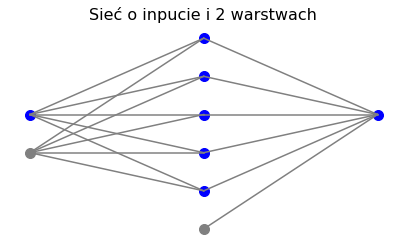

In [344]:
# siec z jedną warstwą pośrednią z kilkoma neuronami
siec=[2,6,2]
plot_net(siec)

Ponieważ odpowiedź w warstwie outputowej jest liniowa, wymaga to drobnych modyfikacji w uprzednim kodzie:

In [345]:
def feed_forward_lin(n_war, wagi, x_in):
    """Propagacja sygnału w przód z liniową odpowiedzią w ostatniej warstwie"""
    li_war=len(n_war)
    
    x={} # słownik, który będzie zawierać warości sygnałów we wszystkkich warstwach
    x.update({0: np.array(x_in)}) 
     
    for i in range(1,li_war-1): # pętla po warstwach od inputowej do przedostatniej
        a=np.dot(x[i-1],wagi[i]) # sygnał docierający do warstwy i
        b=[sig(a[q]) for q in range(len(a))] # sygnał wychodzacy z warstwy i
                                    # (określony przez sigmoid)
        x.update({i: np.insert(b,0,1)}) 
        
    for i in range(li_war-1,li_war): # ostatnia warstwa
        a=np.dot(x[i-1],wagi[i])  # odpowiedź liniowa - TU MODYFIKACJA
        x.update({i: np.insert(a,0,1)}) 
    return x

In [346]:
def back_prop_lin(dane, odp, p, n_war, wagi, eps):
    """Propagacja wsteczna dla sieci z liniową odpowiedzią w warstwie outputowej"""
 
    li_war=len(n_war) # liczba warstw (licząc wszystkie)

    po=np.insert(dane[p],0,1) # dodanie do punktu danych jedynki na początku (węzeł progowy)

    x=feed_forward_lin(n_war,wagi,po) # propagacja sygnału do przodu
   
    n=n_war[li_war-1]-1  # liczba neuronów w warstwie outputowej 
    
    k=len(n_war)-2       # liczba warstw pośrednich
                         # wszystkich warstw jest k+2, są numerowane jako 0,1,2,...,k+1
                         # tj. 0 - inputowa, k+1 - outputowa, pozostałe pośrednie

    D={}                 # słownik dla wielkości D z wyprowadzenia
    
    D.update({k+1:       # D[k+1] - dla warstwy outputowej
        [2*(x[k+1][gam]-odp[p][gam-1])*
        (np.dot(x[k],wagi[k+1]))[gam-1] for gam in range(1,n+1)]}) 
                         # nie ma pochodnej sigmoidu - TU MODYFIKACJA

    wagi[k+1]-=eps*np.outer(x[k],D[k+1]) # uaktualnienie wag prowadzącch do warstwy outputowej

    # pętla po pozostałych warstwach po j = k, k-1, ..., 1
    for j in reversed(range(1,k+1)):            # pętla w odwrotnej kolejności
        u=np.delete(np.dot(wagi[j+1],D[j+1]),0) # implementacja wzoru z wyprowadzenia
        v=np.dot(x[j-1],wagi[j])        
        D.update({j: [u[i]*dsig(v[i]) for i in range(len(u))]}) # dopisanie D[j] do słownika
        wagi[j]-=eps*np.outer(x[j-1],D[j])      # uaktualnienie wag

### Propagacja wsteczna dla interpolacji danych

In [347]:
wagi=ran_w_s(siec,2) # początkowe losowe wagi

# Jeśli się wywraca, puszczać do skutku
for k in range(300): 
    for p in range(len(da_f)):
        back_prop_lin(da_f,od_f,p,siec,wagi,.01)

In [354]:
for k in range(3000):  # puścić kilka razy
    for p in range(len(da_f)):
        back_prop_lin(da_f,od_f,p,siec,wagi,.01)

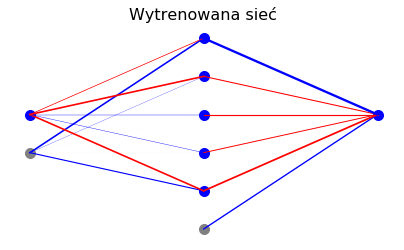

In [355]:
plot_net_w_s(siec,wagi,.3)

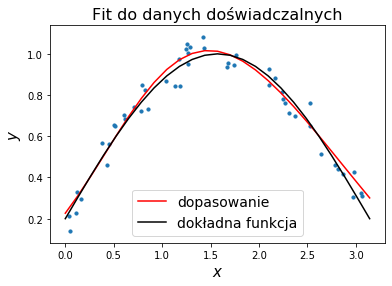

In [356]:
res=[feed_forward_lin(siec, wagi, [1,x])[2][1] for x in coo]

plt.figure(figsize=(6,4))

plt.title("Fit do danych doświadczalnych",fontsize=16) 
plt.scatter(da_f,od_f,s=10)


plt.plot(coo,res,c='red',label='dopasowanie')
plt.plot(coo,exact,c='black',label='dokładna funkcja')

plt.legend(prop={'size':14})

plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',fontsize=15);

Powyżej widzimy, że dopasowana krzywa z sieci neuronowej (czerwona linia) jest bliska "prawdziwej" funkcji, którą generowaliśmy dane (dodając zaszumienie).

## Inny przykład

In [357]:
# przykład 2

upx=2.5*np.pi # górna granica zakresu współrzędnych x

def dane():
    x = upx*random.random()
    y = 0.5*x+fi(x)+0.2*(random.random()-0.5)
    return [x,y]

Wygenerujmy bardzo mało (cztery) punktów "doświadczalnych":

In [358]:
tab=np.array([dane() for i in range(4)])
da_f=np.delete(tab,1,1)
od_f=np.delete(tab,0,1)

In [359]:
# próbka, która działa
tab = np.array([[0.6432499 , 1.21514432],
       [3.89672961, 1.39409431],
       [6.05585965, 2.99145512],
       [5.38399617, 2.0815502 ]])

da_f=np.delete(tab,1,1)
od_f=np.delete(tab,0,1)

... i więcej danych:

In [360]:
tab2=np.array([dane() for i in range(400)])
da_f2=np.delete(tab2,1,1)
od_f2=np.delete(tab2,0,1)

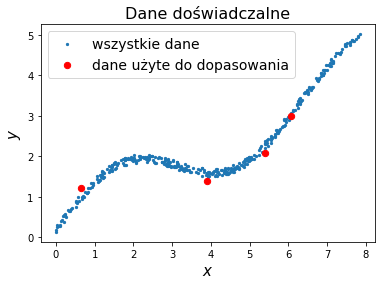

In [361]:
plt.figure(figsize=(6,4))

coo=np.linspace(0,upx,25) # równo odległe punkty

exact=[0.5*x+fi(x) for x in coo]

plt.title("Dane doświadczalne",fontsize=16) 
plt.scatter(da_f2,od_f2,s=5,label='wszystkie dane')
plt.scatter(da_f,od_f,s=40,c='red',label='dane użyte do dopasowania')

plt.legend(prop={'size':14})

plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',fontsize=15);

Użyjmy teraz takiej sieci:

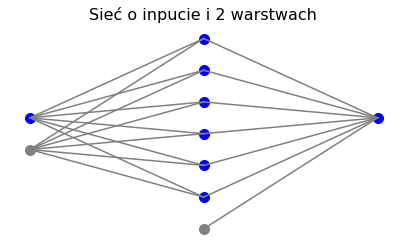

In [362]:
# siec z jedną warstwą pośrednią z kilkoma neuronami
siec=[2,7,2]
plot_net(siec)

In [375]:
wagi=ran_w_s(siec, 5) # początkowe losowe wagi

for k in range(100): 
    for p in range(len(da_f)):
        back_prop_lin(da_f,od_f,p,siec,wagi,.02)

In [379]:
for _ in range(3000):  # ew. puścić kilka razy
    for p in range(len(da_f)):
        for _ in range(10):
            back_prop_lin(da_f,od_f,p,siec,wagi,.02)

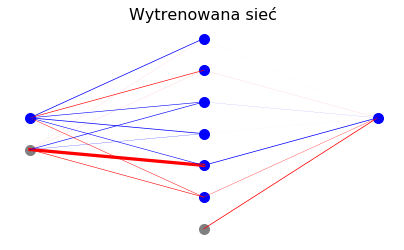

In [380]:
plot_net_w_s(siec,wagi,.1)

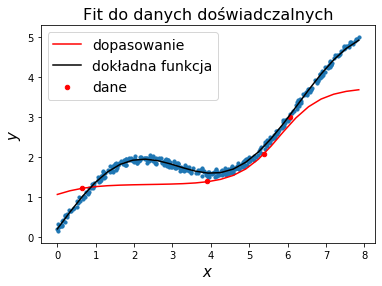

In [381]:
coo=np.linspace(0,upx,25)
res=[feed_forward_lin(siec, wagi, [1,x])[2][1] for x in coo]

exact=[0.5*x+fi(x) for x in coo]

plt.figure(figsize=(6,4))


plt.plot(coo,res,c='red',label='dopasowanie')
plt.plot(coo,exact,c='black',label='dokładna funkcja')

plt.title("Fit do danych doświadczalnych",fontsize=16) 
plt.scatter(da_f2,od_f2,s=10)
plt.scatter(da_f,od_f,s=20,c='red',label='dane')

plt.legend(prop={'size':14})

plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',fontsize=15);

Na powyższym rysunku widzimy, że dane doświadczalne możemy naszą siecią neuronową dopasować **dokładnie**, co wynika z faktu, że mamy dużo więcej parametrów sieci niż punktów danych (wag w użytej sieci jest 19). Jednocześnie uzustana interpolacja (czerwona linia) nijak się nie ma do "prawdziwej" funkcji. Efekt taki nazywa się **przetrenowaniem** sieci i jest nieporządany. Aby go nie było, należy sieć trenować na próbce o znacznie większej liczbie danych niż parametrów (wag). 

### Powtórz powyższe symulacje dla próbki o dużej liczbie punktów

## Uwagi:

- Aby interpolować w 2 lub więcej wymiarach, należy użyć sieci o co najmniej 2 warstwach pośrednich.

- Danych musi być znacznie więcej niż parametrów sieci, by uniknąć przetrenowania.


## Zadania:

1. Użyj powyższych kawałków kodu, aby dopasować punkty danych wygenerowanych wg Twojej ulubionej funkcji z zaszumieniem.

2. Użyj sieci o większej liczbie warstw (co najmniej 2 pośrednie), aby dopasować punkty danych wygenerowane funkcją dwóch zmiennych 
$f(x_1,x_2)= x_1 x_2\, e^{-x_1^2-2 x_2^2}$, $x_i \in [-1.5,1.5]$,
czy inną podobną. Zrób dwuwymiarowe wykresy konturowe dla tej funkcji oraz dla funkcji uzyskanej z Twojej sieci neuronowej i porównaj je (powinny byc bardzo podobne, jeśli wszystko działa).

# Koniec